In [1]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import get_dataset_df_from_file as get_world_dataset_df_from_file

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch the latest data

If the interface is overloaded, the collector will retry every few seconds.

In [4]:
df, states_in_order = get_dataset_df()
fns = save_data(df, states_in_order)
print("data saved to {} and {}".format(*fns))

            positive       negative       pending  hospitalizedCurrently  \
count    1701.000000    1563.000000    475.000000             129.000000   
mean     1419.462669    7319.815739   1474.193684            1214.139535   
std      7059.518944   16298.822207   8563.311744            3227.794648   
min         0.000000       0.000000     -3.000000               2.000000   
25%         9.000000     123.500000      4.000000              39.000000   
50%        90.000000    1260.000000     21.000000              75.000000   
75%       580.000000    6920.500000    109.000000             424.000000   
max    122031.000000  180249.000000  64400.000000           16479.000000   

       hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
count              495.000000       39.000000        79.000000   
mean               618.723232      964.000000       280.848101   
std               2681.001660     1299.216647       616.975088   
min                  0.000000        9.000000      

### Fetch data set from local disk

In [5]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-04-01_1652_state_daily_data.csv 2020-04-03_1525_state_daily_data.csv
2020-04-01_1652_state_rank.csv       2020-04-03_1525_state_rank.csv
2020-04-01_1654_state_daily_data.csv 2020-04-04_0009_state_daily_data.csv
2020-04-01_1654_state_rank.csv       2020-04-04_0009_state_rank.csv
2020-04-01_1658_state_daily_data.csv 2020-04-04_1605_state_daily_data.csv
2020-04-01_1658_state_rank.csv       2020-04-04_1605_state_rank.csv
2020-04-03_0323_state_daily_data.csv 2020-04-04_1612_state_daily_data.csv
2020-04-03_0323_state_rank.csv       2020-04-04_1612_state_rank.csv
2020-04-03_0345_state_daily_data.csv 2020-04-05_1913_state_daily_data.csv
2020-04-03_0345_state_rank.csv       2020-04-05_1913_state_rank.csv
2020-04-03_1448_state_daily_data.csv 2020-04-06_1603_state_daily_data.csv
2020-04-03_1448_state_rank.csv       2020-04-06_1603_state_rank.csv
2020-04-03_1503_state_daily_data.csv 2020-04-06_1613_state_daily_data.csv
2020-04-03_1503_state_rank.csv       2020-04-06_1613_state_rank.csv
Latest

In [6]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0 2020-03-04    NY       6.0      48.0     24.0                    NaN   
1 2020-03-05    NY      22.0      76.0     24.0                    NaN   
2 2020-03-06    NY      33.0      92.0    236.0                    NaN   
3 2020-03-07    NY      76.0      92.0    236.0                    NaN   
4 2020-03-08    NY     105.0      92.0      NaN                    NaN   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                     NaN             NaN              NaN   
2                     NaN             NaN              NaN   
3                     NaN             NaN              NaN   
4                     NaN             NaN              NaN   

   onVentilatorCurrently  ...  totalTestResults  posNeg fips deathIncrease  \
0                    NaN  ...                54      54   36           NaN   
1                    NaN  ...                98      98   36           0.0   
2                    NaN  ...               125     125   36           0.0   
3                    NaN  ...               168     168   36           0.0   
4                    NaN  ...               197     197   36           0.0   

   hospitalizedIncrease  negativeIncrease  positiveIncrease  \
0                   NaN               NaN               NaN   
1                   0.0              28.0              16.0   
2                   0.0              16.0              11.0   
3                   0.0               0.0              43.0   
4                   0.0               0.0              29.0   

   totalTestResultsIncrease  order  lastUpdateEt  
0                       NaN      0    2020-04-05  
1                      44.0      0    2020-04-05  
2                      27.0      0    2020-04-05  
3                      43.0      0    2020-04-05  
4                      29.0      0    2020-04-05  

[5 rows x 27 columns]

In [7]:
dfus, _ = get_state_df(df, "*")
dfus["sum_of_tests"] = dfus["positive"] + dfus["negative"] + dfus["pending"]
dfus.tail()

date  positive   negative  pending  totalTestResults   death  \
28 2020-04-01  210816.0   939190.0  59669.0           1150006  4700.0   
29 2020-04-02  239099.0  1028649.0  62101.0           1267748  5784.0   
30 2020-04-03  271988.0  1124874.0  61980.0           1396862  6962.0   
31 2020-04-04  305755.0  1318052.0  15573.0           1623807  8314.0   
32 2020-04-05  332308.0  1429724.0  17307.0           1762032  9498.0   

          lastUpdateEt  daily_new_positive  sum_of_tests  
28 2020-04-06 10:00:00             26133.0     1209675.0  
29 2020-04-06 10:00:00             28283.0     1329849.0  
30 2020-04-06 10:00:00             32889.0     1458842.0  
31 2020-04-06 10:00:00             33767.0     1639380.0  
32 2020-04-06 10:00:00             26553.0     1779339.0

### Zero-day normalized log of total verified covid-19 cases

Improvment in flattening slopes. (The "grass" blows over to the right.)

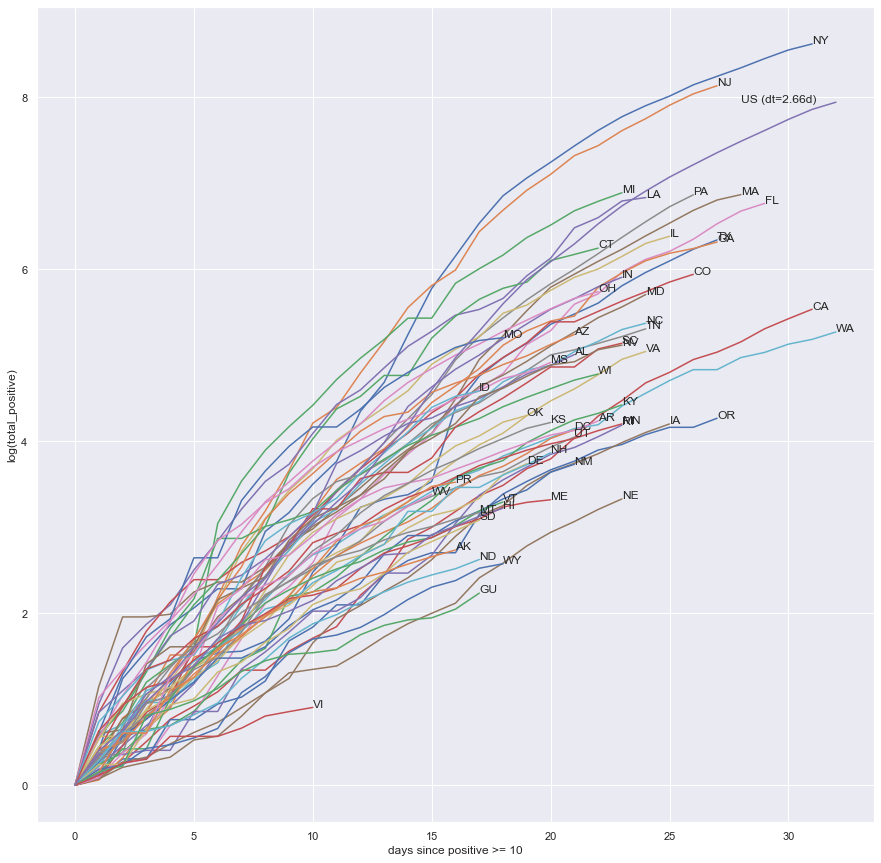

In [8]:
# start after day with min_pos or more cases
min_pos = 10
last_n_days = None

# image
plt.figure(figsize=[15,15])

key_value = "days_since_{}".format(min_pos)

# state by state
for s in states_in_order:
    try:
        dfq, dt, lud = get_state_doubling_df(df, s, zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
        plt.plot(dfq[key_value].values, dfq.log_positive.values)
        plt.annotate(s, (dfq[key_value].values[-1], dfq.log_positive.values[-1]))
    except IndexError:
        pass

# All US image
try:
    dfq, dt, lud = get_state_doubling_df(df, "*", zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
    plt.plot(dfq[key_value].values, dfq.log_positive.values)
    xus = int(.9* dfq[key_value].values[-1])
    plt.annotate("US (dt={:1.2f}d)".format(dt), (xus , dfq.log_positive.values[-1]))
except IndexError:
    pass

plt.xlabel("days since positive >= {}".format(min_pos))
plt.ylabel("log(total_positive)")
plt.show()

### US Total verifice covid-19 cases; current doubling period and history of doubling periods

Use the last few days to estimate the current doubling period. Plot the with past data for context.

US Total Positive, doubling every 5.15 days
  as of 2020-04-06T10:00
  based on last 10 days of data


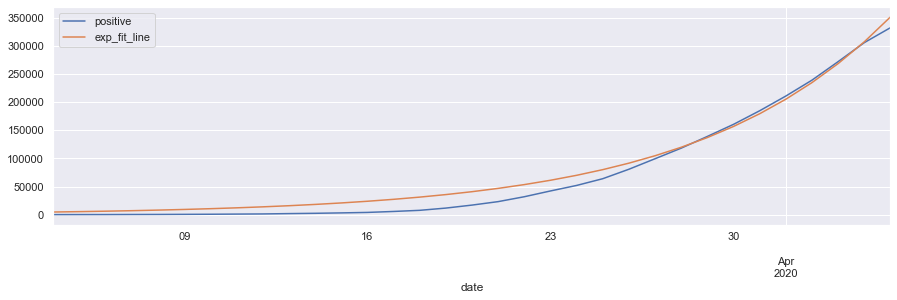

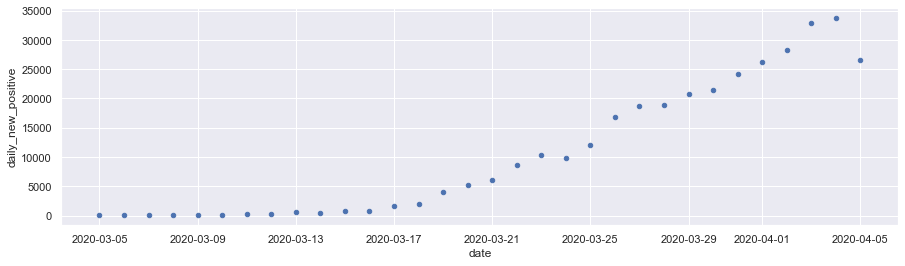

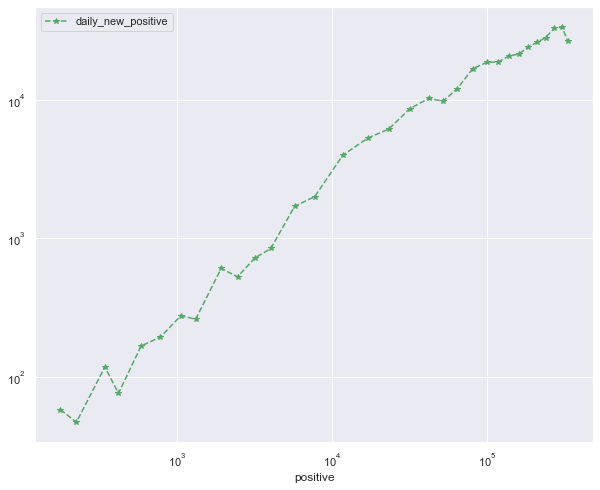

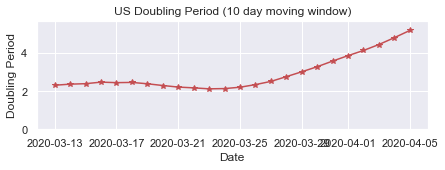

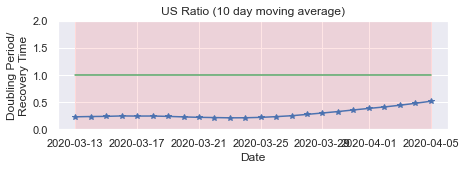

In [9]:
last_n_days = 10
dfa, dt, lud = get_state_doubling_df(df, "*", use_last_n_days=last_n_days)
lu = str(lud)[:16]
print("US Total Positive, doubling every {:.3} days\n  as of {}".format(dt, lu))
print("  based on last {} days of data".format(last_n_days))
dfa.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
dfa.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
dfa.plot(x="positive", y="daily_new_positive", figsize=[10,8], style="*--g", logy=True, logx=True)
period_factor_plot(dfq, "*", ylimit=2)
plt.show()

### Testing data

Test positive rate is the number of covid-19 positive test over the total number of tests.

Uncertainty in the total number of tests due to the emerging private testing?

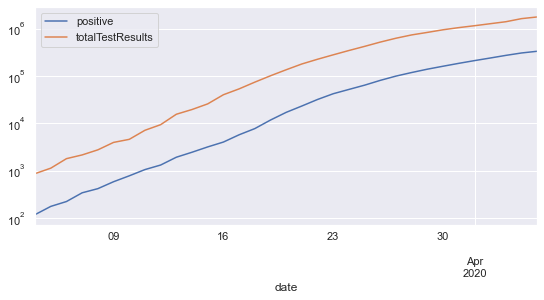

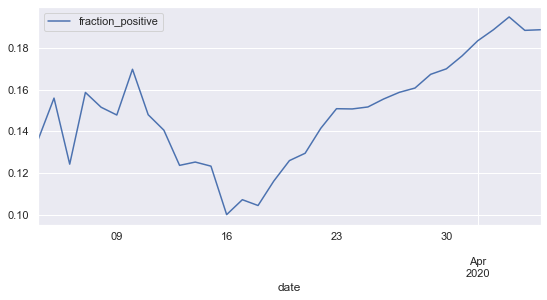

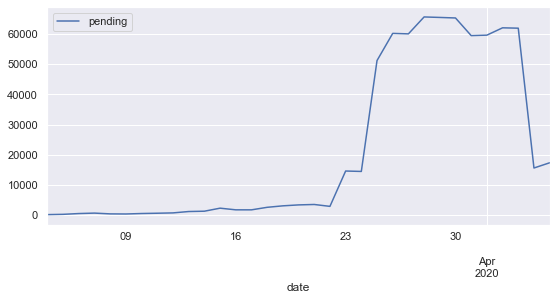

In [10]:
dfus["fraction_positive"] = dfus["positive"]/ dfus["totalTestResults"]
ax = dfus.plot(x="date", y="positive", logy=True, figsize=[9,4])
dfus.plot("date", "totalTestResults", logy=True, ax=ax)
dfus.plot("date", "fraction_positive", figsize=[9,4])
dfus.plot("date", "pending", figsize=[9,4])

### Current measured ratios and percentages; raw projections for the next few doubling periods

These are based on cases that test postive and test negative (state labs policies vary on this).

In [11]:
print("Current strategies for diagnosis give pos/neg tests ratio of {:.1%}".format(
    dfus.positive.values[-1]/(dfus.totalTestResults.values[-1])))
print("on total tests tracked = {:,}".format(int(dfus.totalTestResults.values[-1])))

Current strategies for diagnosis give pos/neg tests ratio of 18.9%
on total tests tracked = 1,762,032


In [12]:
pos_dr = dfus.death.values[-1]/dfus.positive.values[-1]
print("Current death/positive ratio of {:.1%}".format(pos_dr))

Current death/positive ratio of 2.9%


In [13]:
projections(dfus, dt, pos_dr)
projections(dfus, 2*dt, pos_dr)


US flu death rate average per week = 61,099/52 ≈ 1,174
Using doubling time of 5.15 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-04-05 00 h,    332,308 [total deaths  9,498] Death Rate Avg = 2,144 per wk
   1: 2020-04-10 03 h,    664,616 [total deaths 18,996] Death Rate Avg = 3,678 per wk
   2: 2020-04-15 07 h,  1,329,232 [total deaths 37,992] Death Rate Avg = 6,438 per wk
   3: 2020-04-20 11 h,  2,658,464 [total deaths 75,984] Death Rate Avg = 11,448 per wk

US flu death rate average per week = 61,099/52 ≈ 1,174
Using doubling time of 10.31 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-04-05 00 h,    332,308 [total deaths  9,498] Death Rate Avg = 2,144 per wk
   1: 2020-04-15 07 h,    664,616 [total deaths 18,996] Death Rate Avg = 3,2

### State Trends and Doubling Periods

State=NY  (last_update=2020-04-05T00:00)
Doubling every 6.25 days based on last 10 days of data
(naive estimates: current_unresolved=84773 hosp=12715 icu=3390)


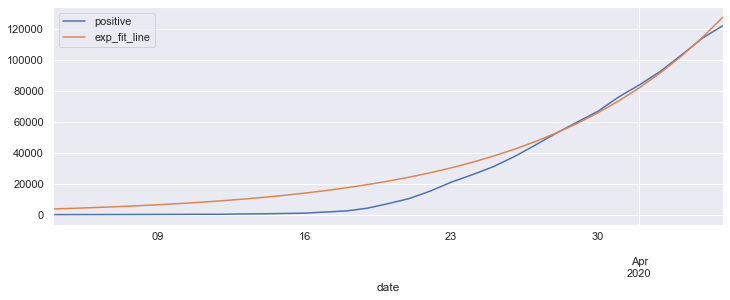

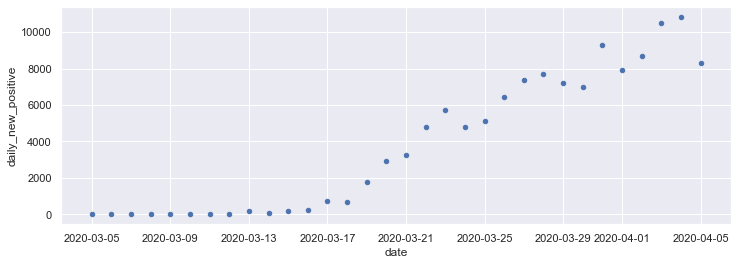

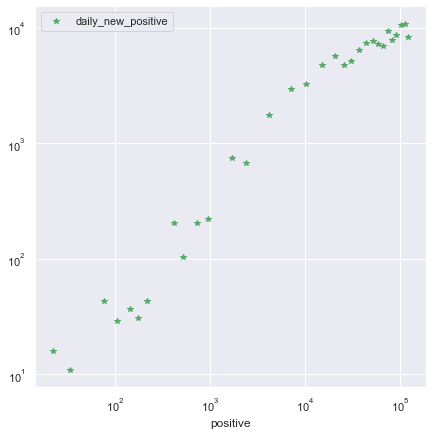

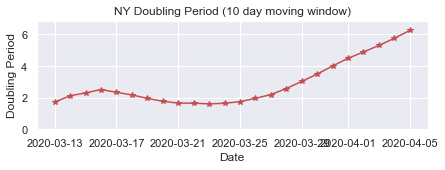

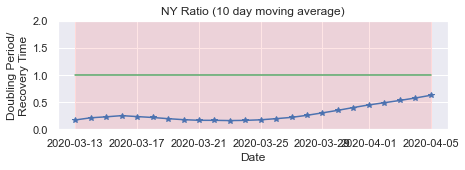

State=NJ  (last_update=2020-04-05T13:00)
Doubling every 4.34 days based on last 10 days of data
(naive estimates: current_unresolved=30629 hosp=4594 icu=1225)


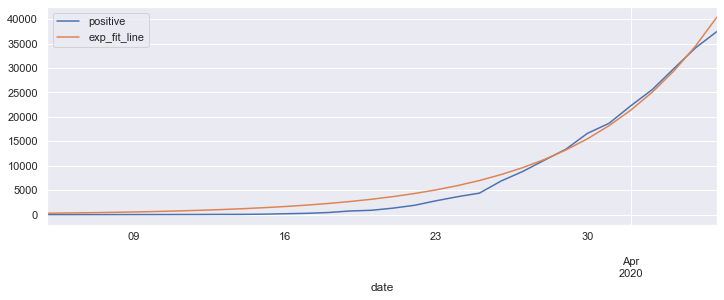

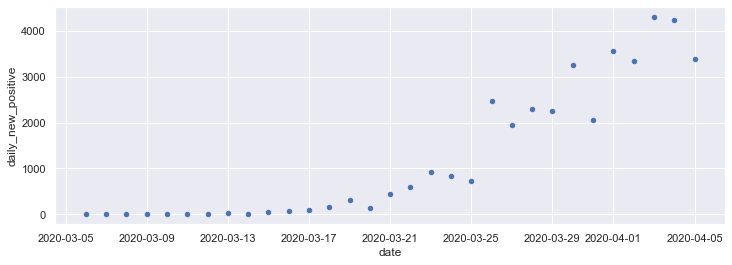

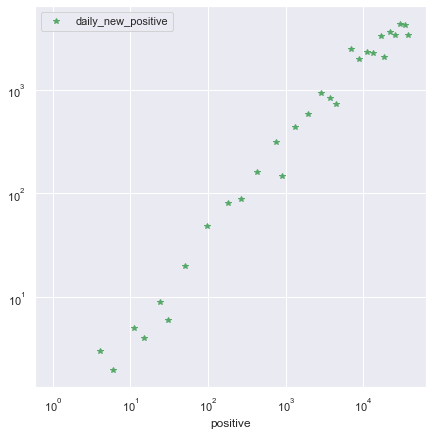

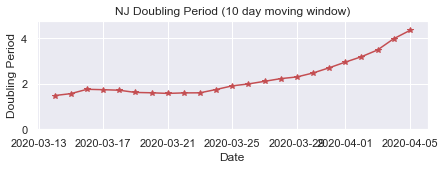

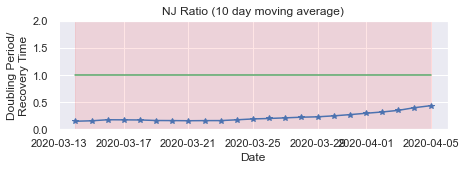

State=MI  (last_update=2020-04-05T11:00)
Doubling every 4.0 days based on last 10 days of data
(naive estimates: current_unresolved=12862 hosp=1929 icu=514)


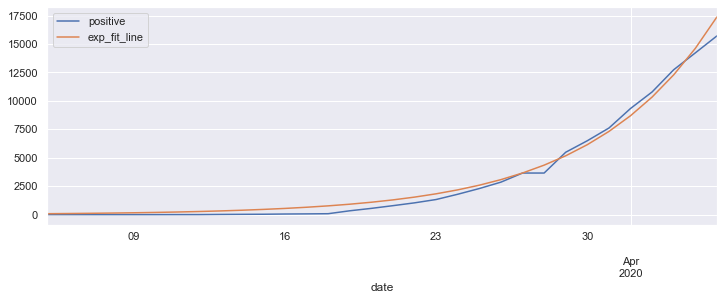

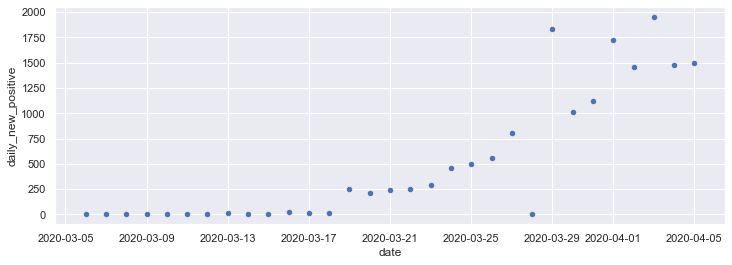

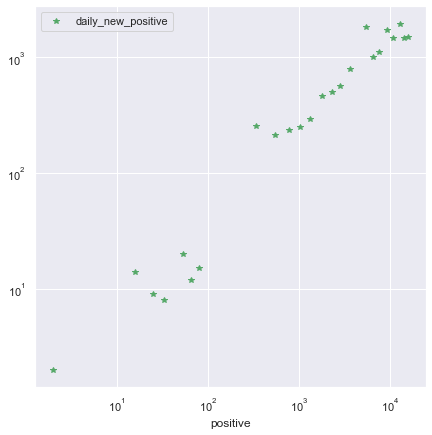

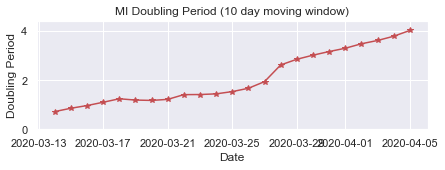

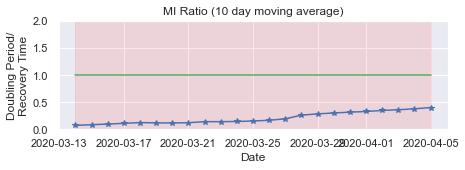

State=CA  (last_update=2020-04-04T00:00)
Doubling every 5.17 days based on last 10 days of data
(naive estimates: current_unresolved=10432 hosp=1564 icu=417)


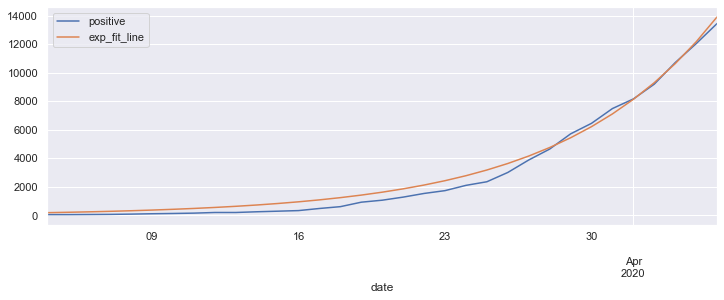

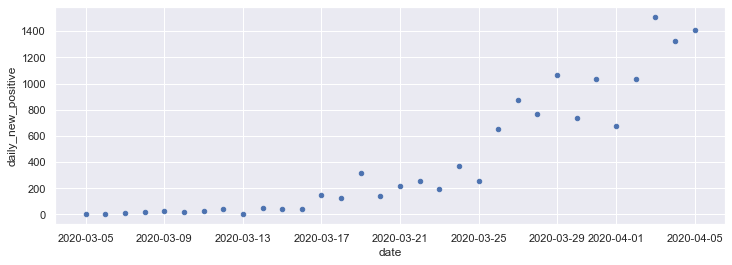

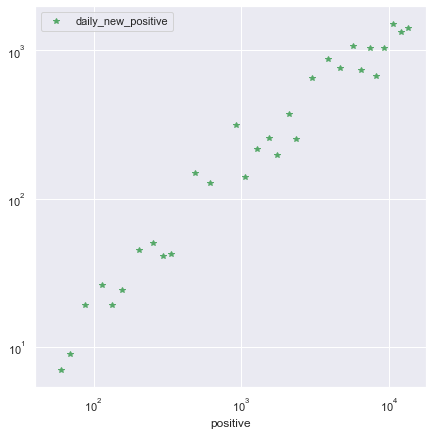

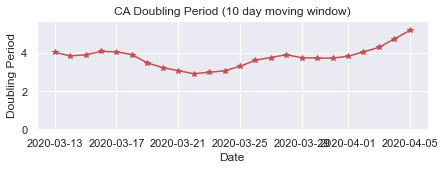

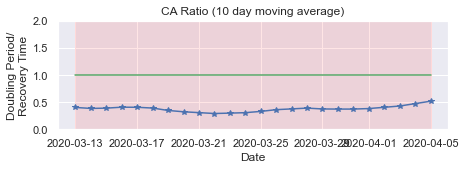

State=LA  (last_update=2020-04-05T13:00)
Doubling every 3.65 days based on last 10 days of data
(naive estimates: current_unresolved=10705 hosp=1605 icu=428)


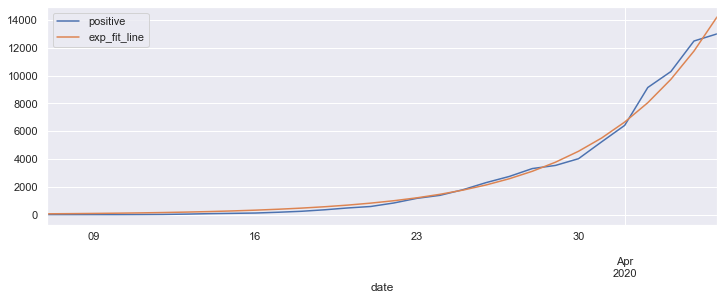

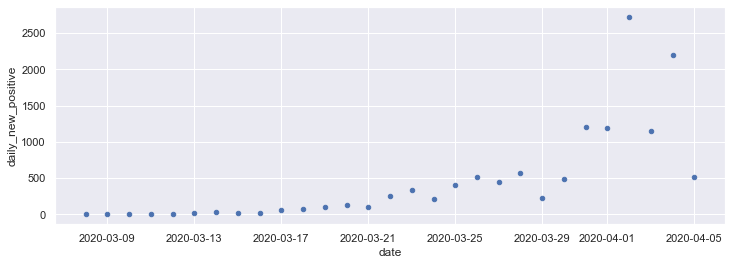

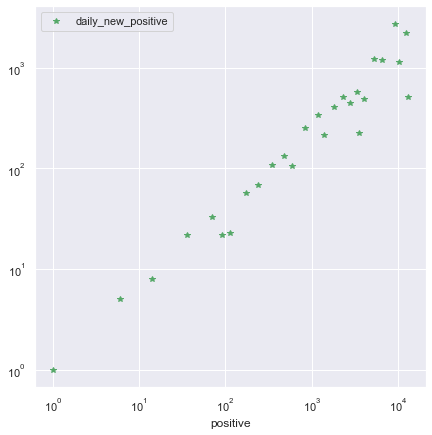

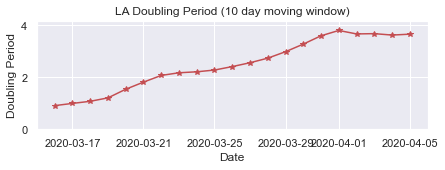

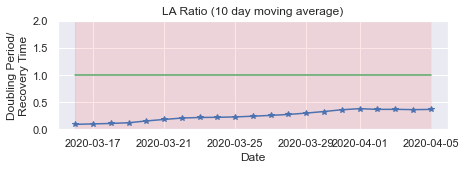

State=MA  (last_update=2020-04-05T12:30)
Doubling every 4.68 days based on last 10 days of data
(naive estimates: current_unresolved=10083 hosp=1512 icu=403)


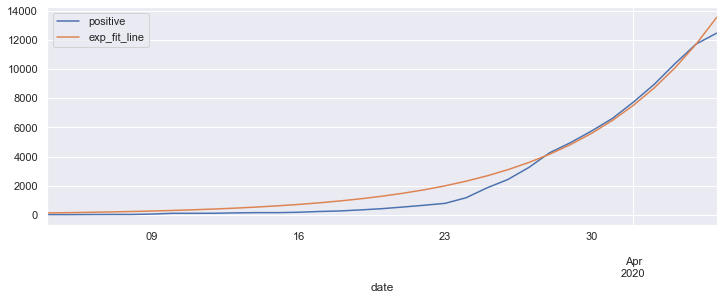

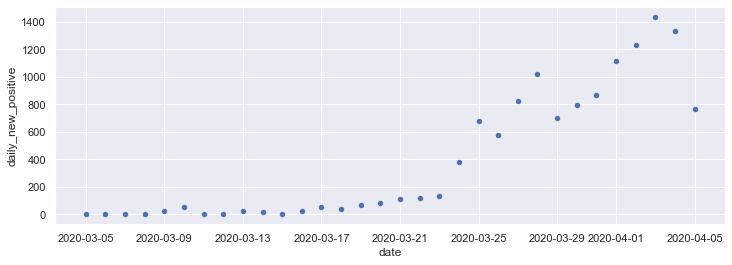

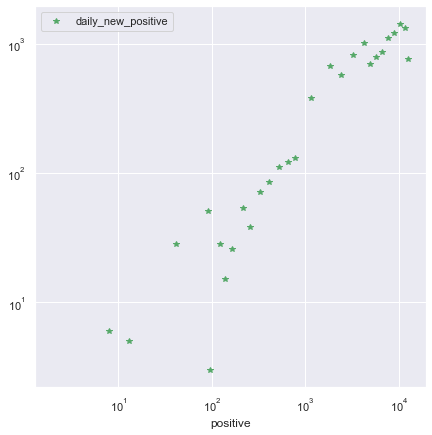

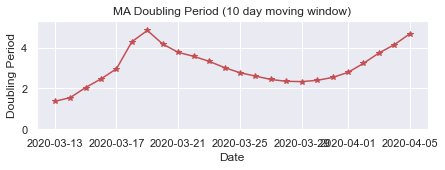

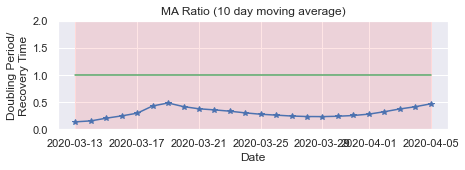

State=FL  (last_update=2020-04-05T13:30)
Doubling every 4.36 days based on last 10 days of data
(naive estimates: current_unresolved=9796 hosp=1469 icu=391)


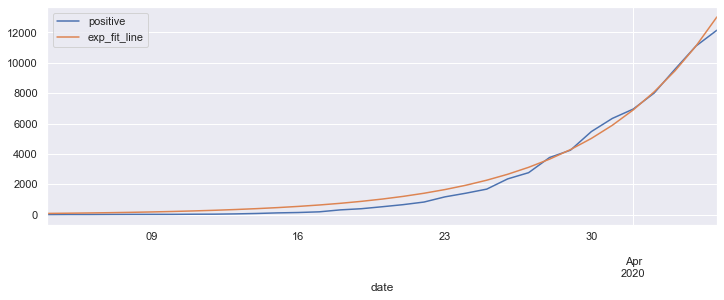

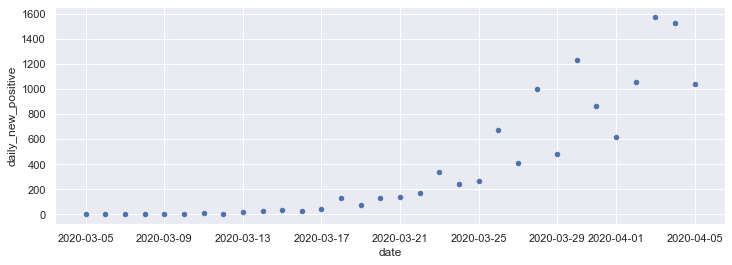

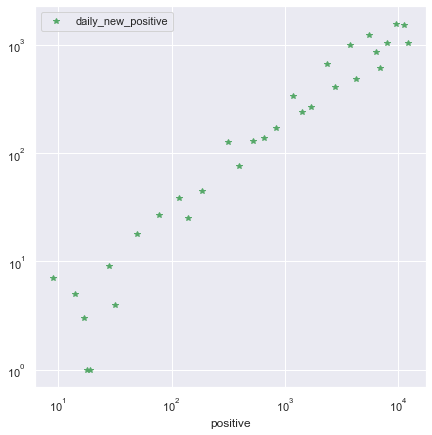

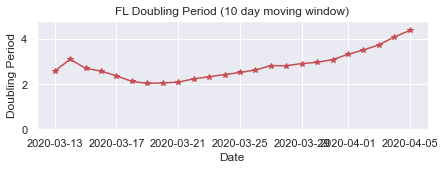

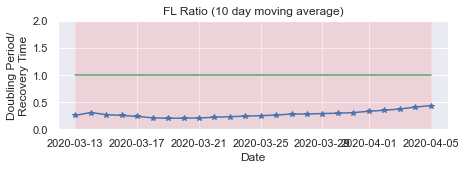

State=PA  (last_update=2020-04-05T12:00)
Doubling every 3.79 days based on last 10 days of data
(naive estimates: current_unresolved=9823 hosp=1473 icu=392)


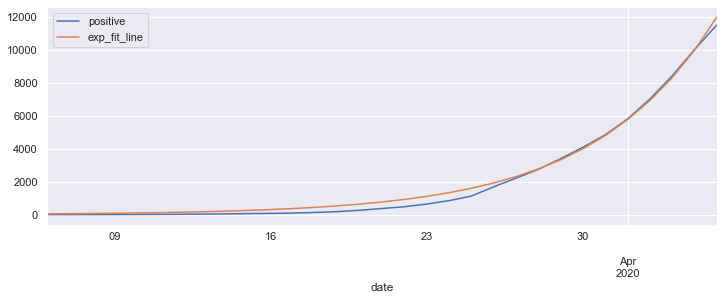

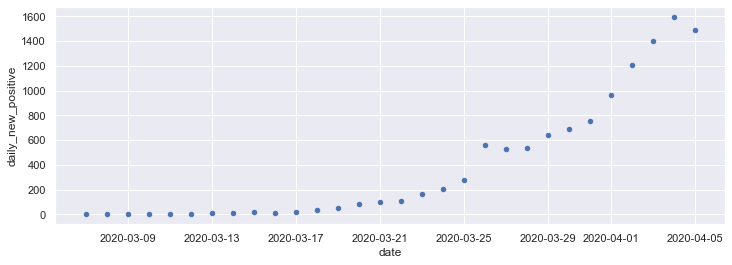

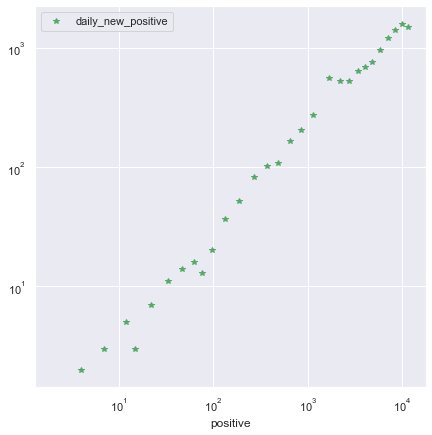

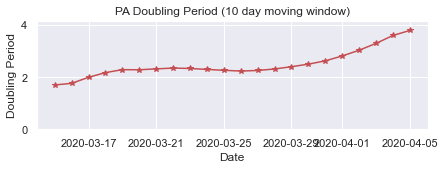

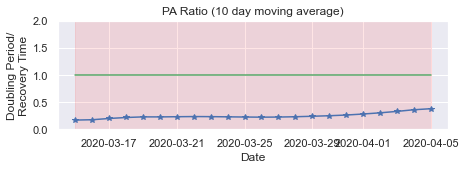

State=IL  (last_update=2020-04-05T00:00)
Doubling every 4.74 days based on last 10 days of data
(naive estimates: current_unresolved=8718 hosp=1307 icu=348)


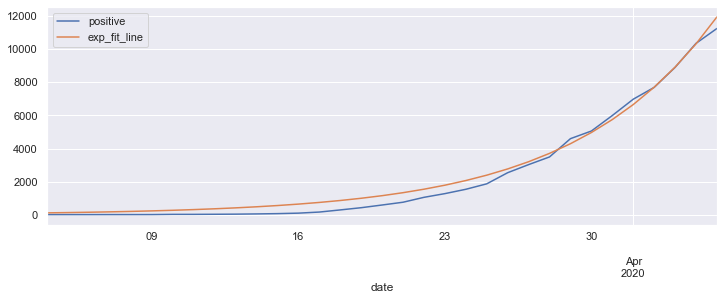

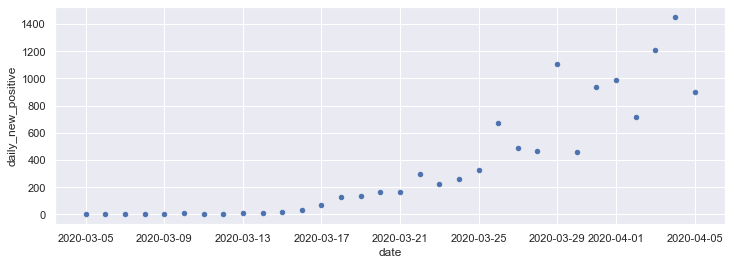

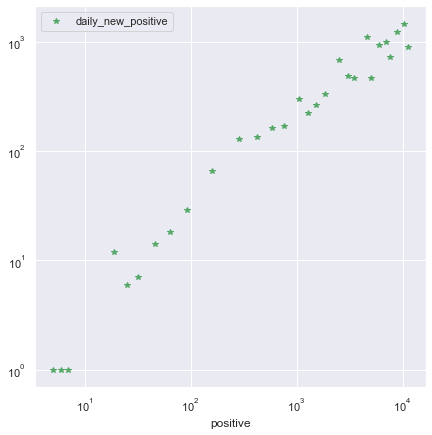

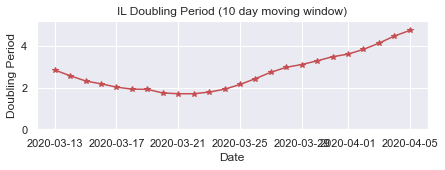

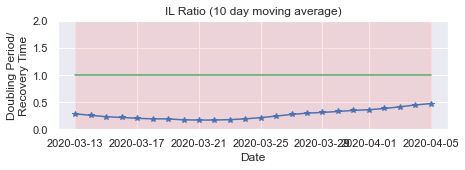

State=WA  (last_update=2020-04-05T19:55)
Doubling every 7.62 days based on last 10 days of data
(naive estimates: current_unresolved=5011 hosp=751 icu=200)


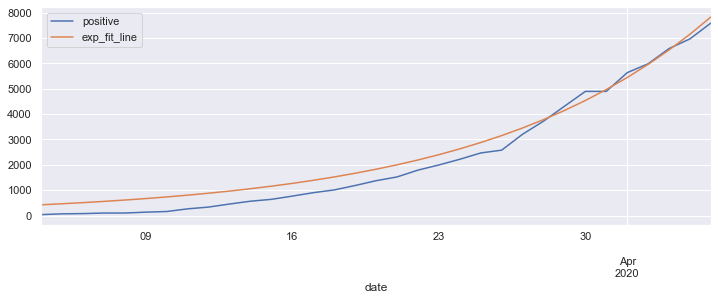

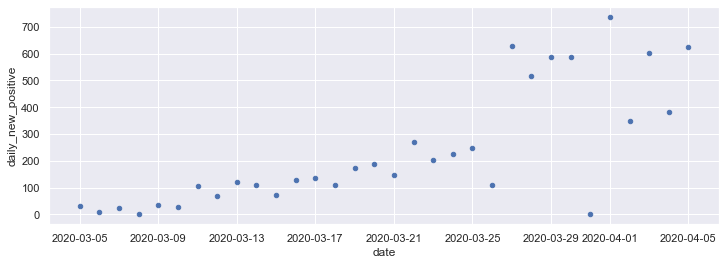

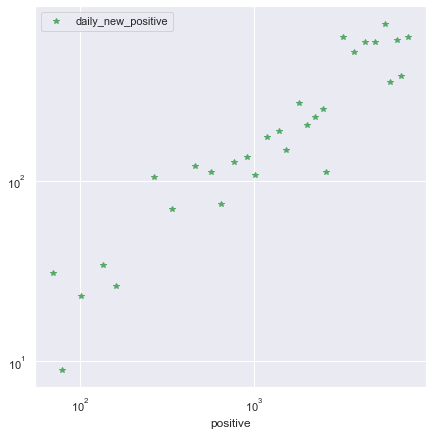

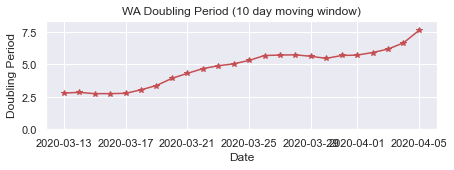

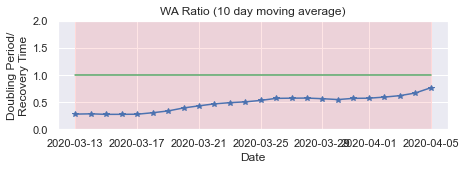

State=TX  (last_update=2020-04-05T13:00)
Doubling every 4.52 days based on last 10 days of data
(naive estimates: current_unresolved=5416 hosp=812 icu=216)


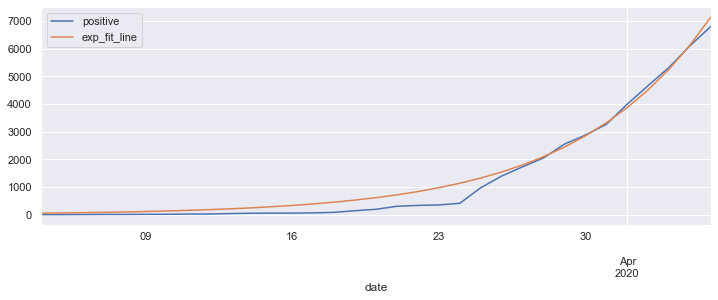

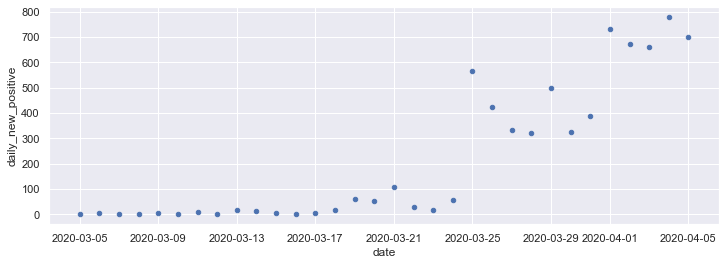

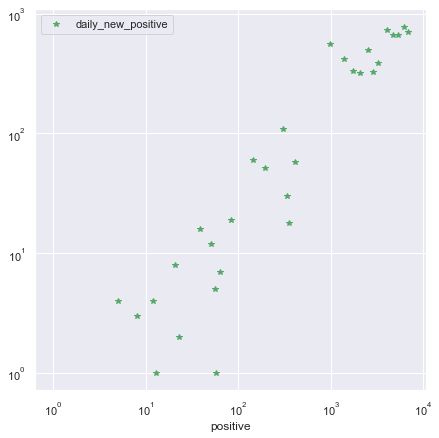

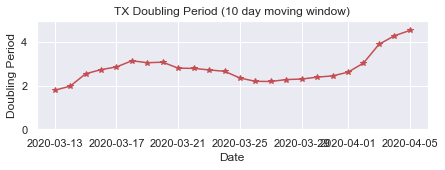

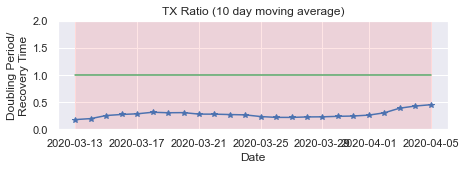

State=GA  (last_update=2020-04-05T18:27)
Doubling every 4.86 days based on last 10 days of data
(naive estimates: current_unresolved=5122 hosp=768 icu=204)


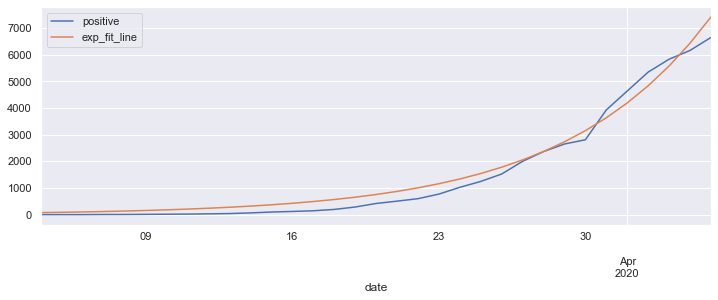

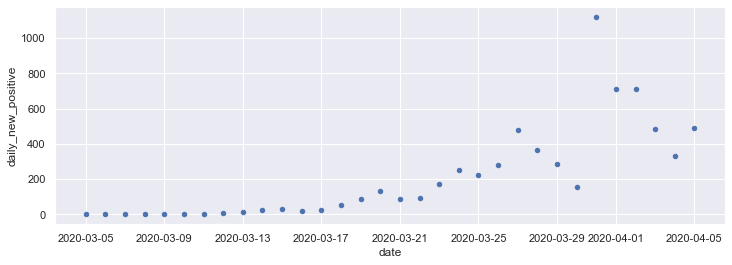

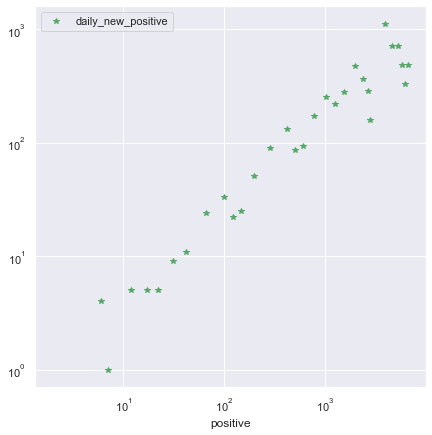

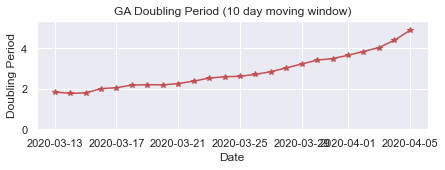

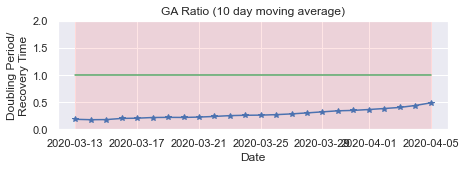

State=CT  (last_update=2020-04-05T12:00)
Doubling every 3.94 days based on last 10 days of data
(naive estimates: current_unresolved=4663 hosp=699 icu=186)


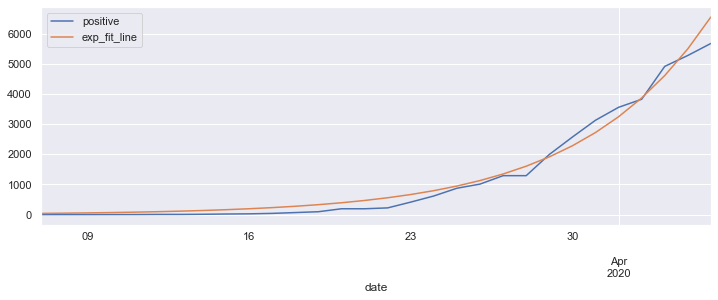

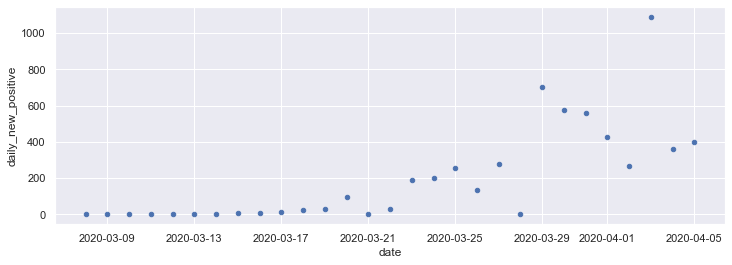

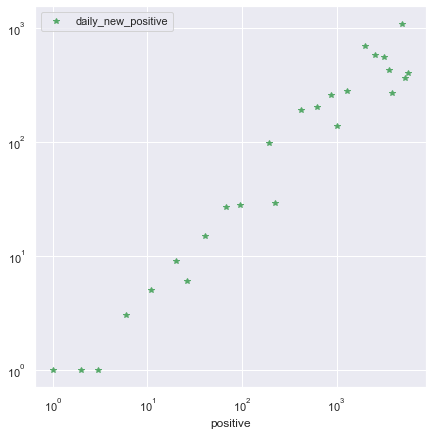

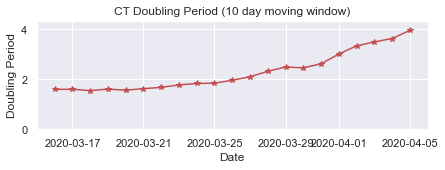

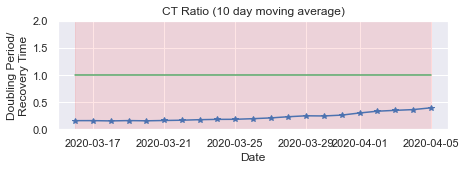

State=CO  (last_update=2020-04-05T18:00)
Doubling every 5.61 days based on last 10 days of data
(naive estimates: current_unresolved=3479 hosp=521 icu=139)


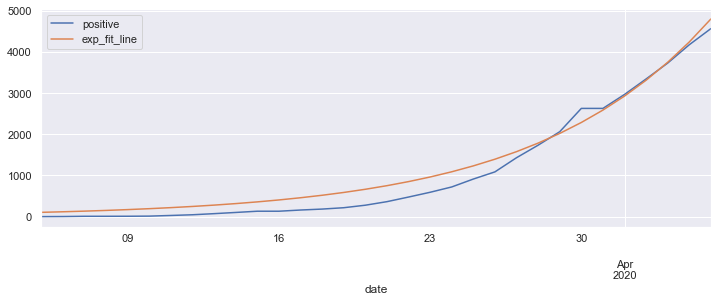

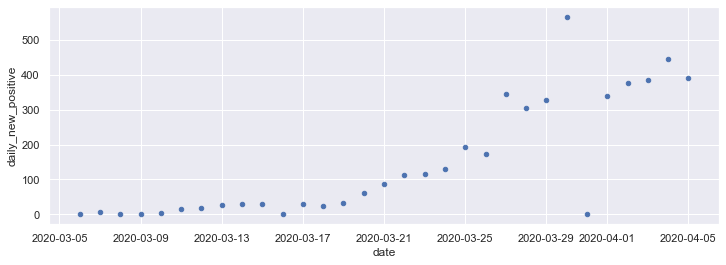

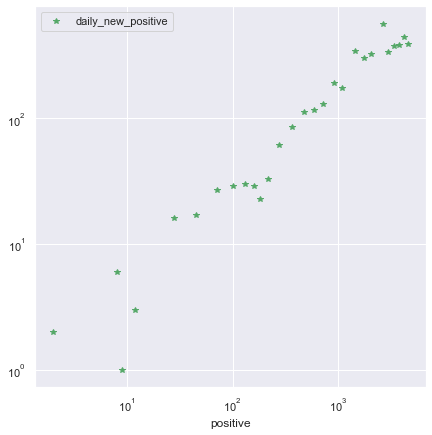

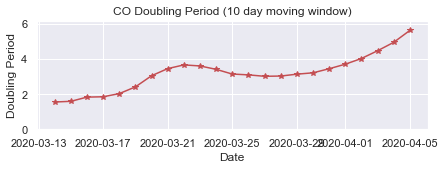

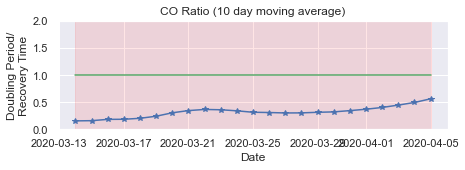

State=IN  (last_update=2020-04-05T14:07)
Doubling every 4.15 days based on last 10 days of data
(naive estimates: current_unresolved=3766 hosp=564 icu=150)


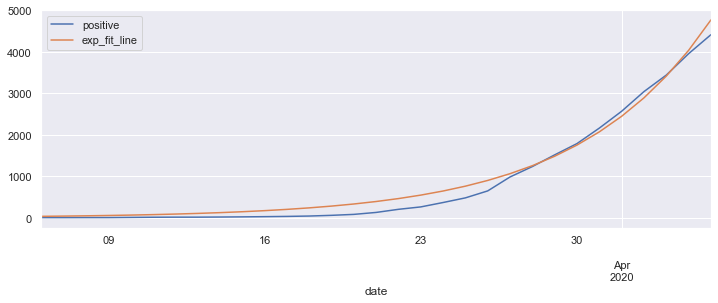

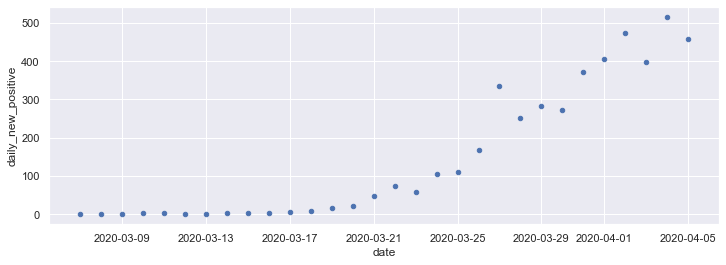

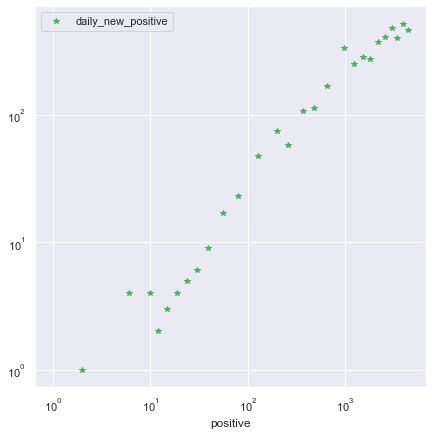

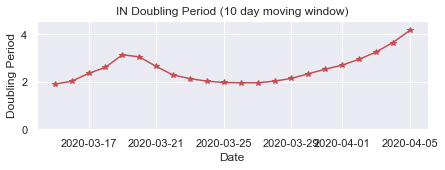

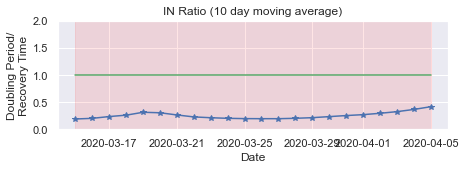

State=MD  (last_update=2020-04-06T10:00)
Doubling every 4.15 days based on last 10 days of data
(naive estimates: current_unresolved=3029 hosp=454 icu=121)


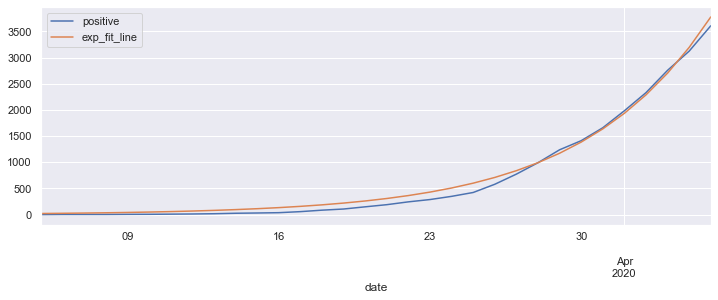

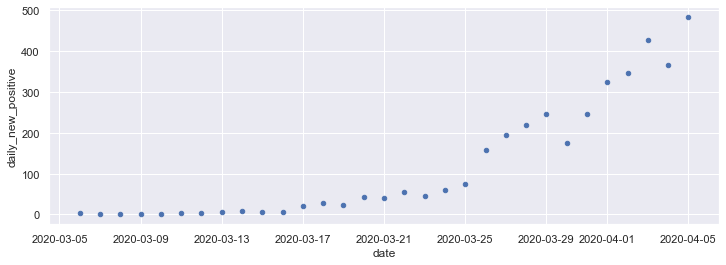

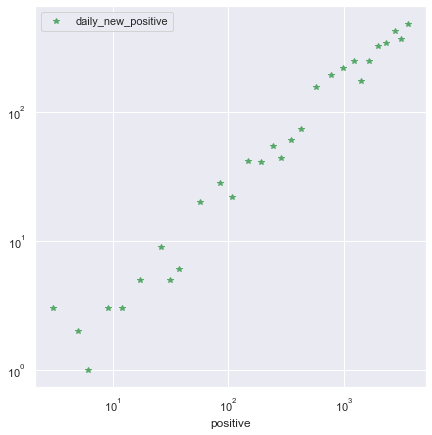

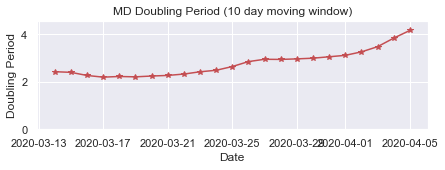

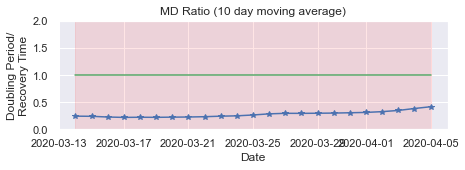

State=OH  (last_update=2020-04-05T14:00)
Doubling every 4.95 days based on last 10 days of data
(naive estimates: current_unresolved=3176 hosp=476 icu=127)


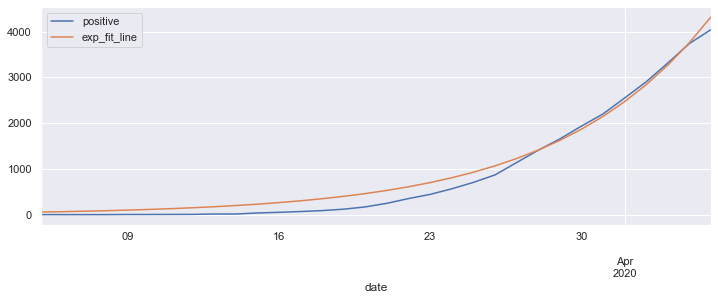

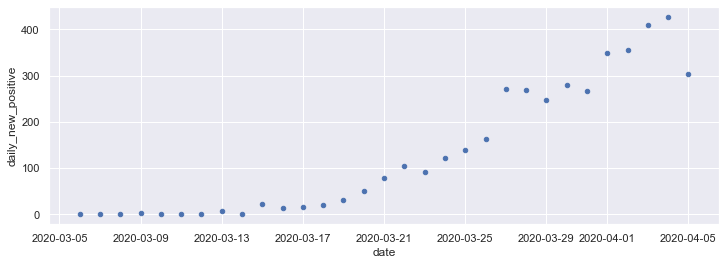

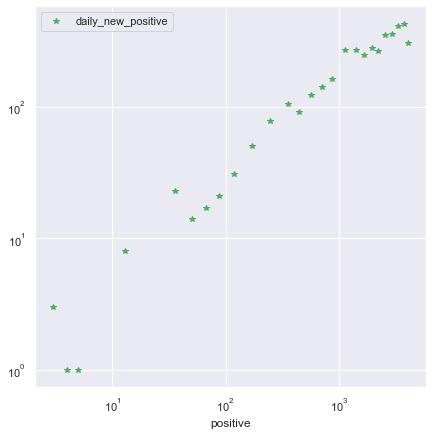

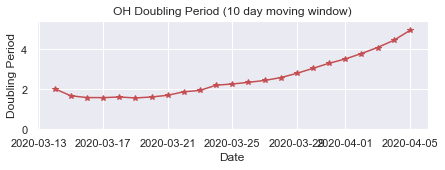

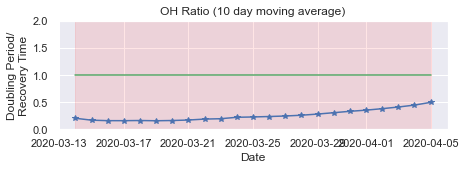

State=TN  (last_update=2020-04-05T15:00)
Doubling every 5.42 days based on last 10 days of data
(naive estimates: current_unresolved=2676 hosp=401 icu=107)


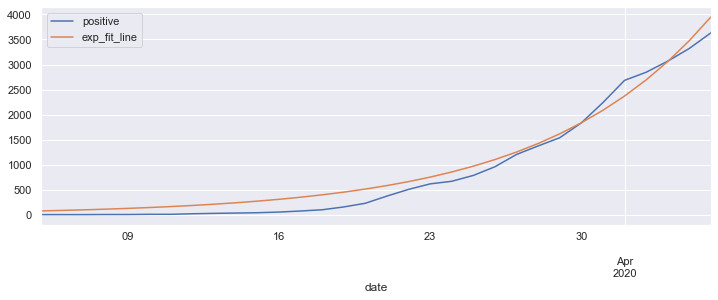

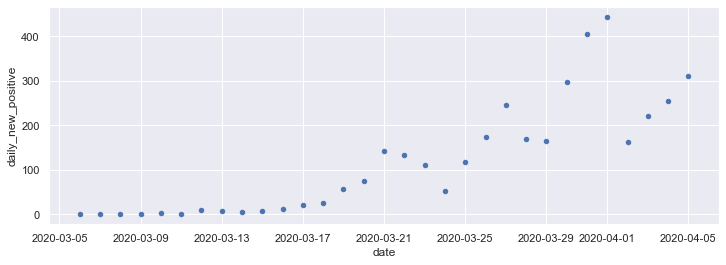

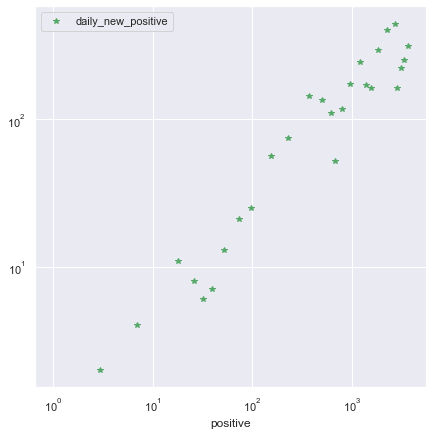

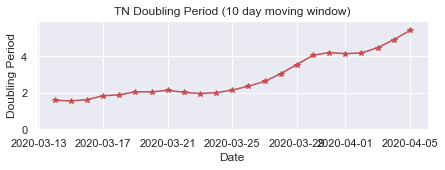

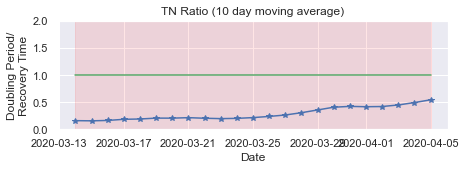

State=VA  (last_update=2020-04-05T17:00)
Doubling every 4.19 days based on last 10 days of data
(naive estimates: current_unresolved=2177 hosp=326 icu=87)


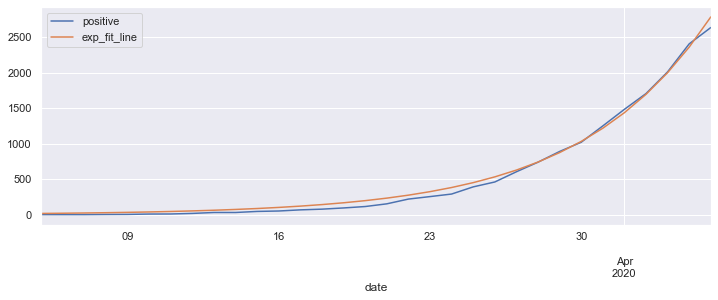

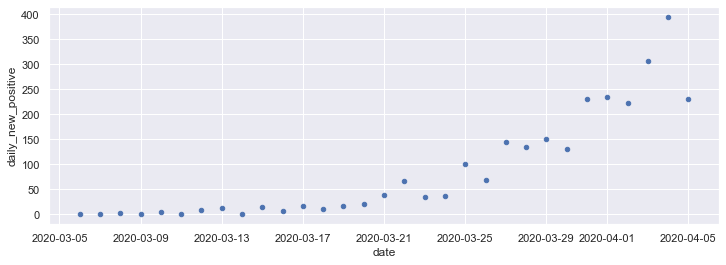

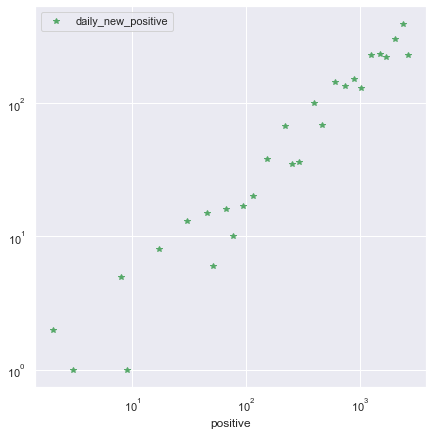

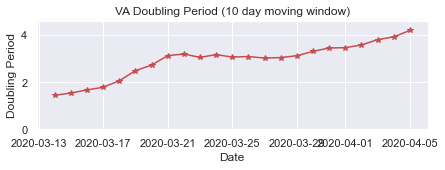

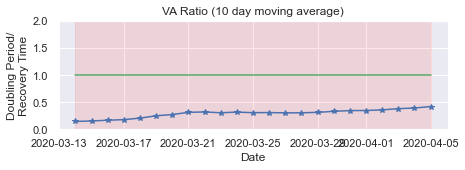

State=NC  (last_update=2020-04-05T11:00)
Doubling every 5.15 days based on last 10 days of data
(naive estimates: current_unresolved=1949 hosp=292 icu=77)


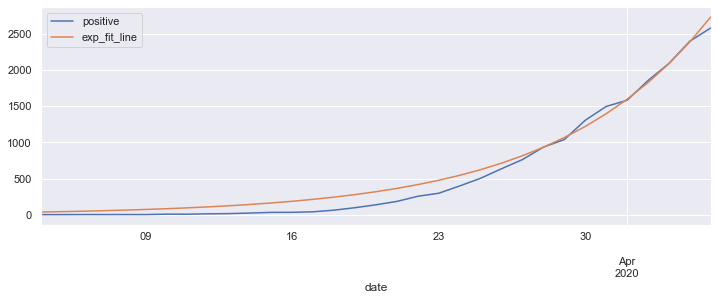

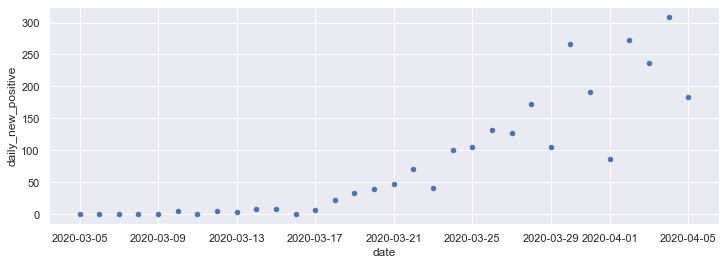

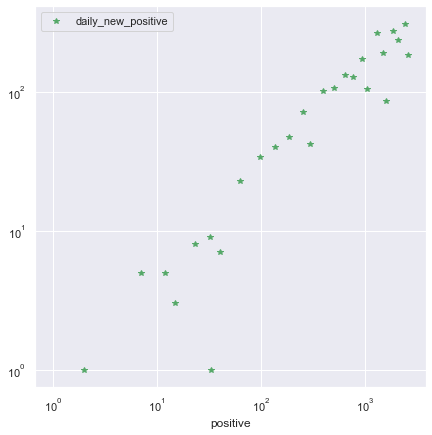

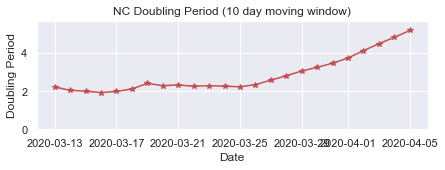

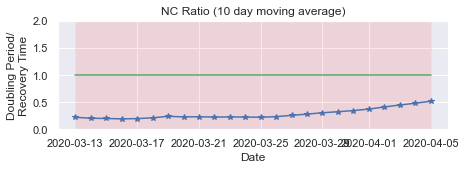

State=MO  (last_update=2020-04-05T15:00)
Doubling every 4.59 days based on last 10 days of data
(naive estimates: current_unresolved=1865 hosp=279 icu=74)


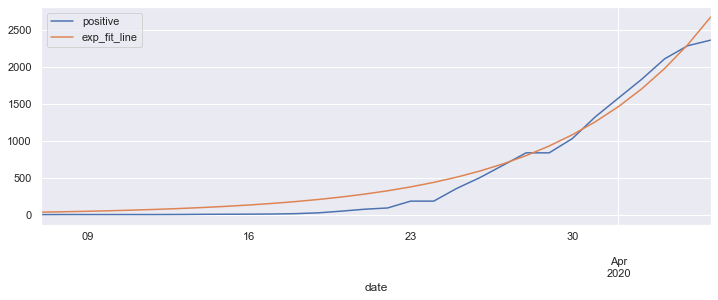

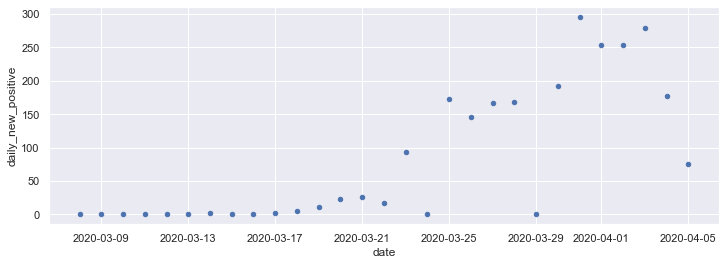

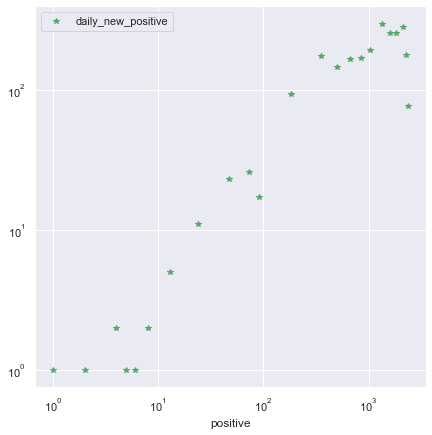

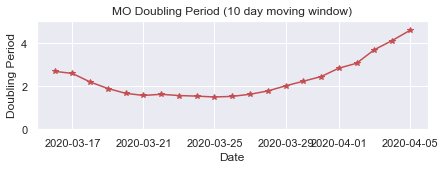

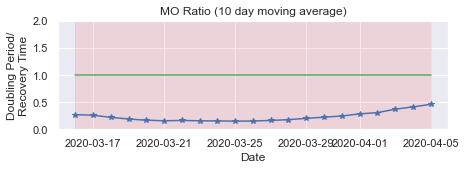

State=AZ  (last_update=2020-04-05T00:00)
Doubling every 5.62 days based on last 10 days of data
(naive estimates: current_unresolved=1692 hosp=253 icu=67)


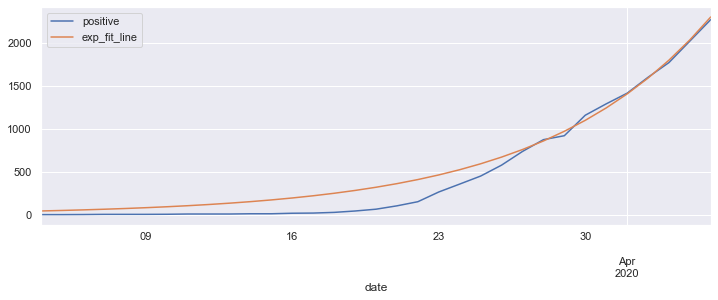

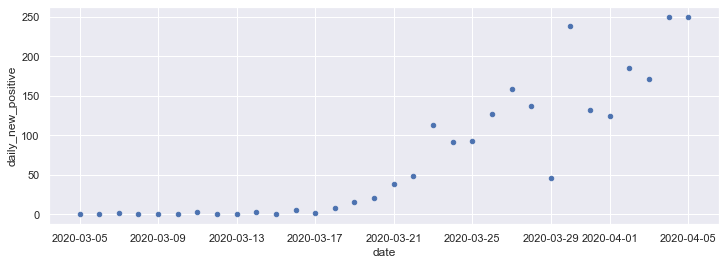

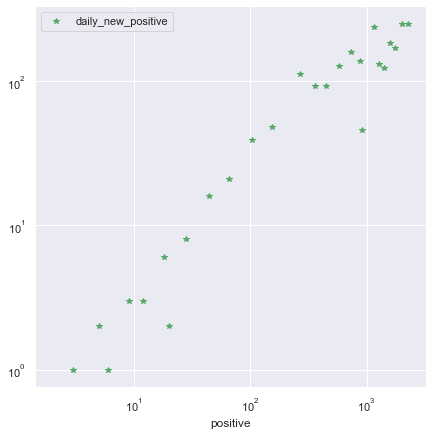

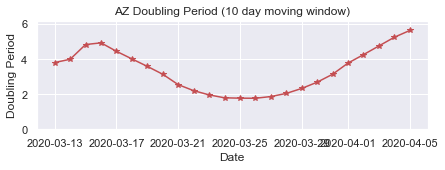

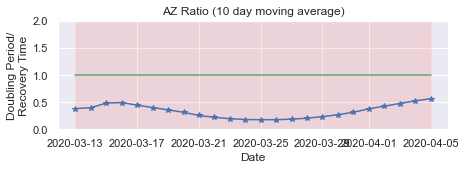

State=WI  (last_update=2020-04-05T16:00)
Doubling every 6.31 days based on last 10 days of data
(naive estimates: current_unresolved=1560 hosp=234 icu=62)


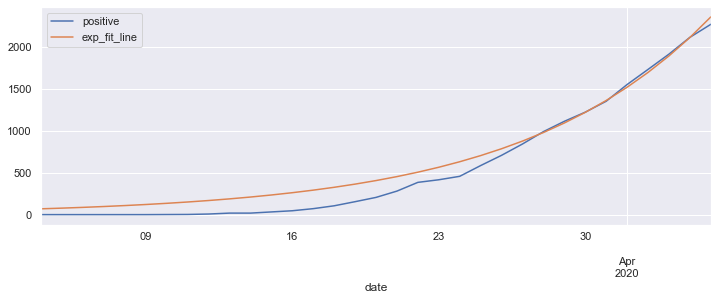

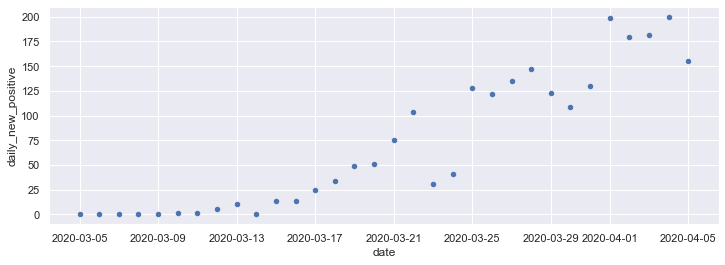

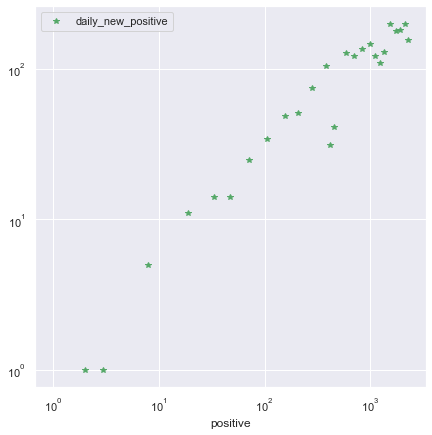

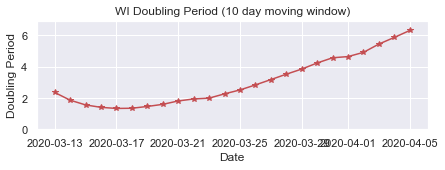

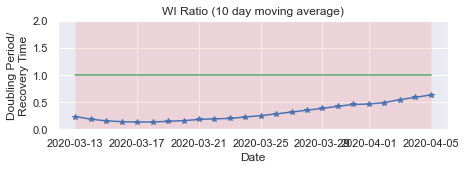

State=SC  (last_update=2020-04-05T15:30)
Doubling every 4.14 days based on last 10 days of data
(naive estimates: current_unresolved=1593 hosp=238 icu=63)


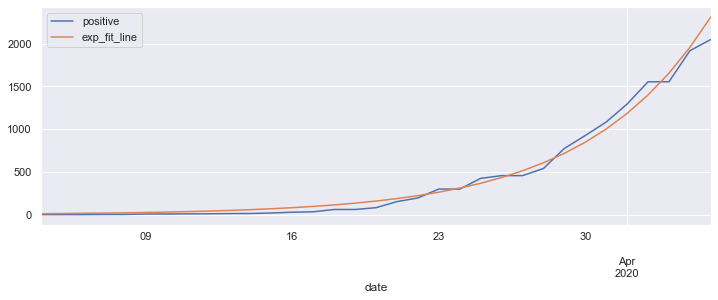

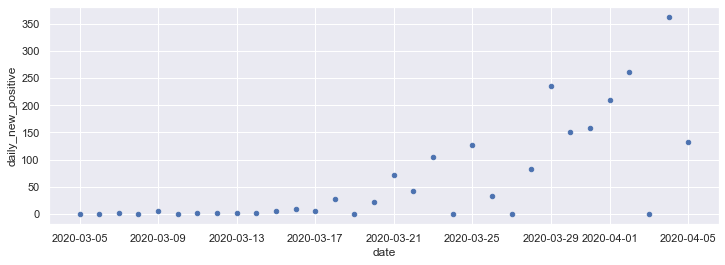

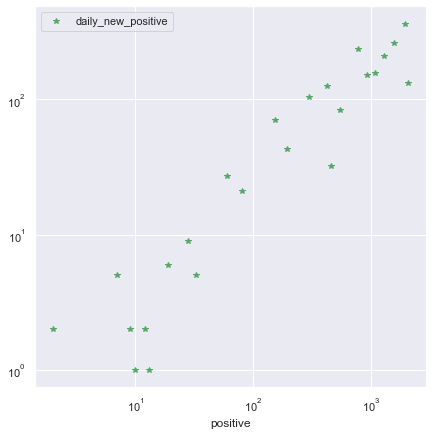

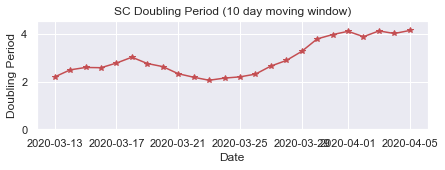

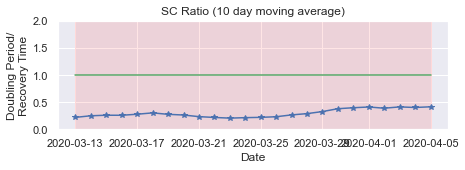

State=AL  (last_update=2020-04-06T00:00)
Doubling every 5.76 days based on last 10 days of data
(naive estimates: current_unresolved=1290 hosp=193 icu=51)


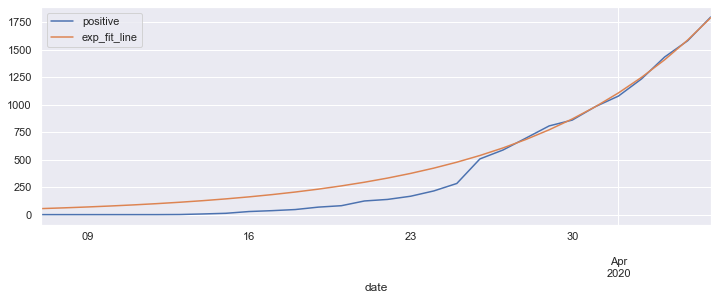

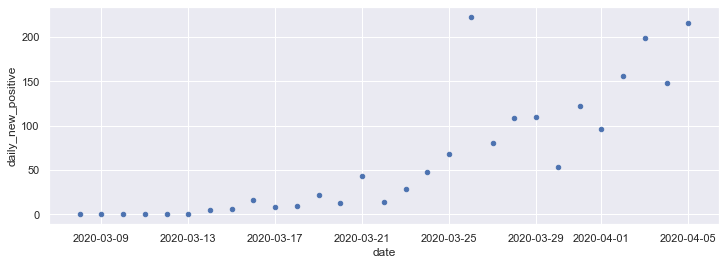

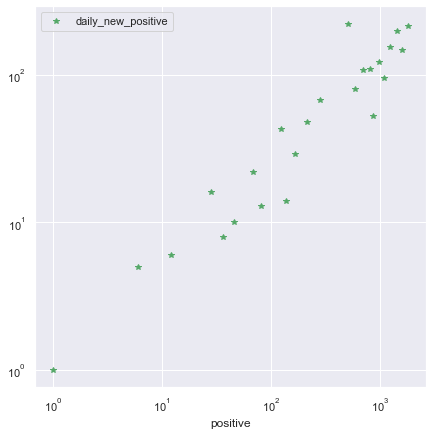

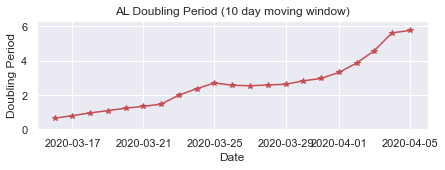

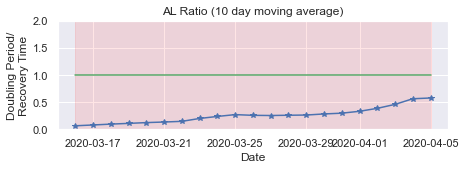

State=NV  (last_update=2020-04-05T09:30)
Doubling every 4.94 days based on last 10 days of data
(naive estimates: current_unresolved=1416 hosp=212 icu=56)


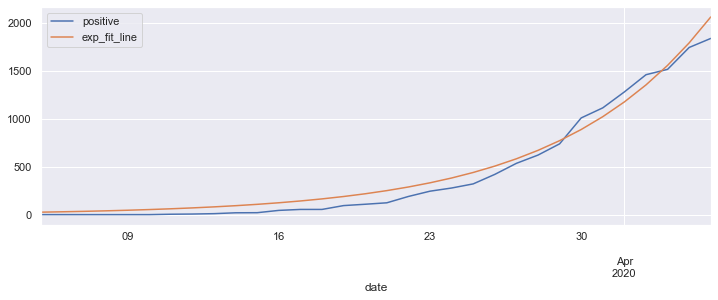

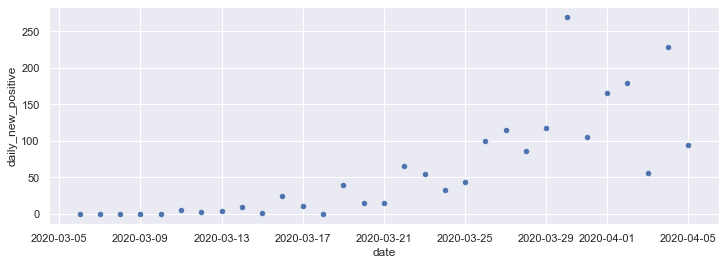

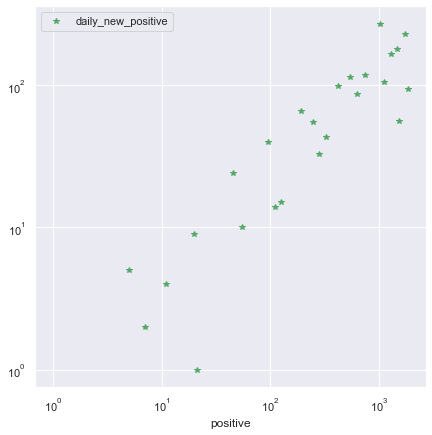

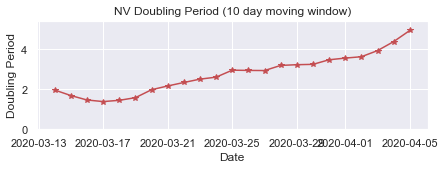

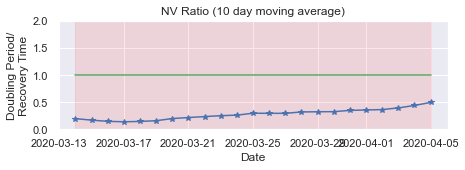

State=MS  (last_update=2020-04-04T19:00)
Doubling every 6.05 days based on last 10 days of data
(naive estimates: current_unresolved=1153 hosp=172 icu=46)


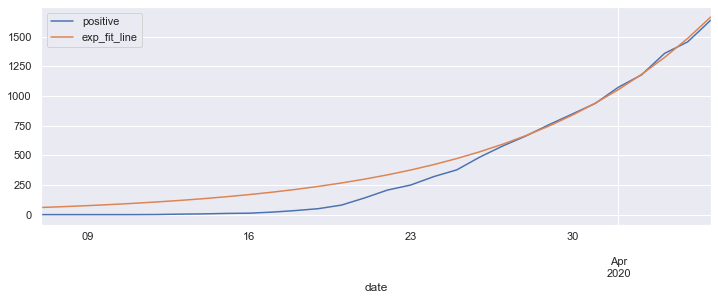

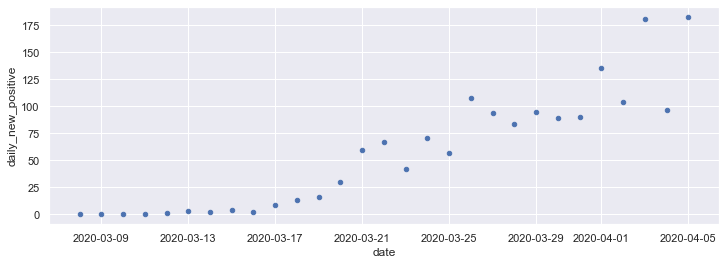

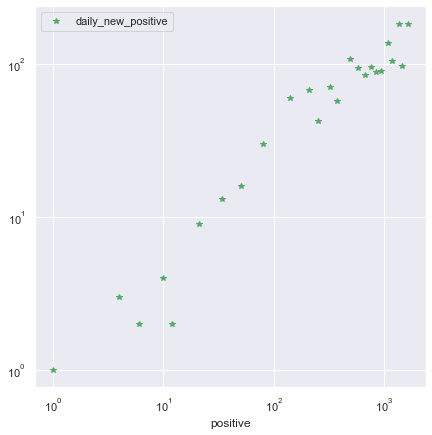

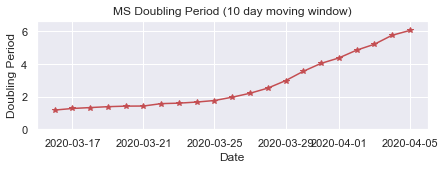

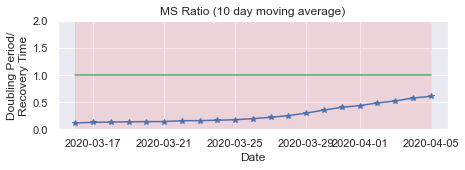

State=UT  (last_update=2020-04-05T15:00)
Doubling every 5.54 days based on last 10 days of data
(naive estimates: current_unresolved=1203 hosp=180 icu=48)


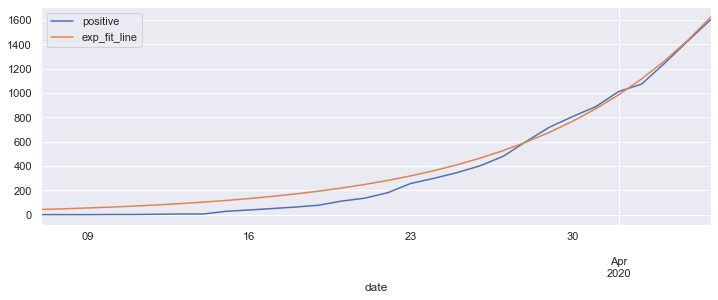

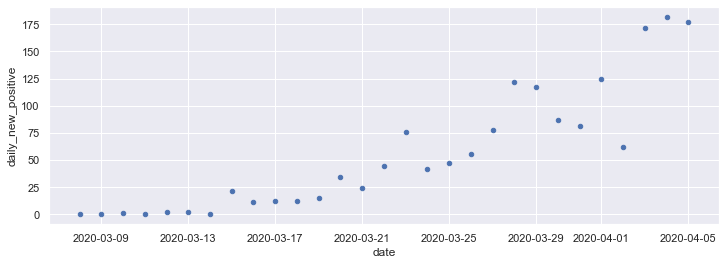

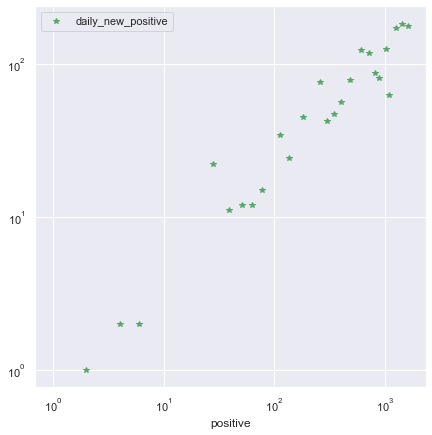

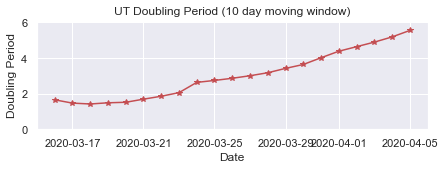

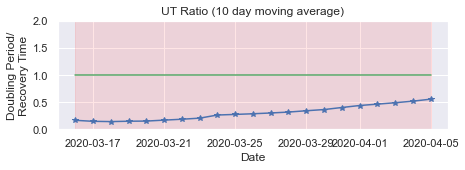

State=OK  (last_update=2020-04-05T08:00)
Doubling every 4.35 days based on last 10 days of data
(naive estimates: current_unresolved=1004 hosp=150 icu=40)


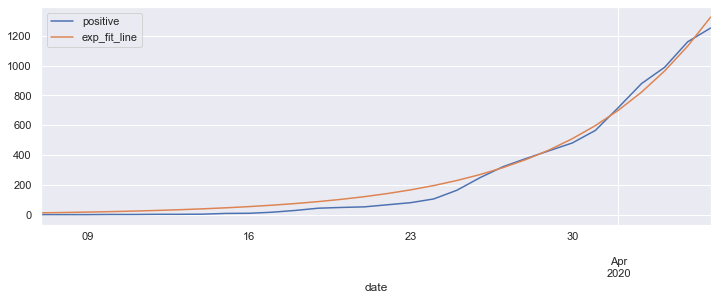

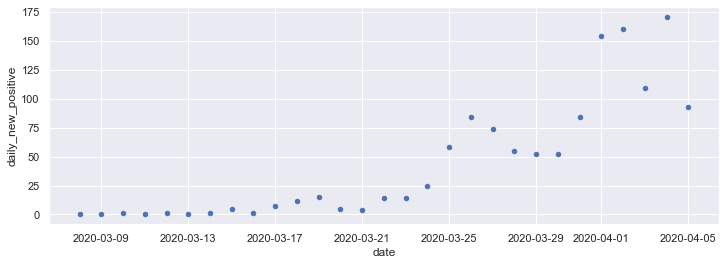

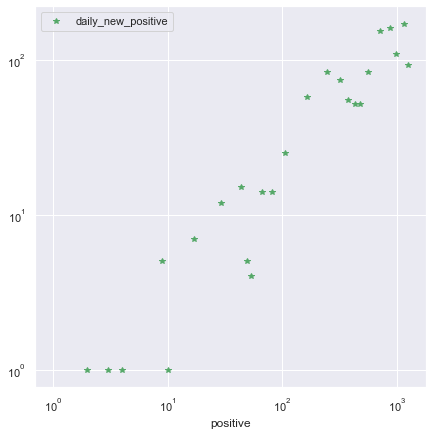

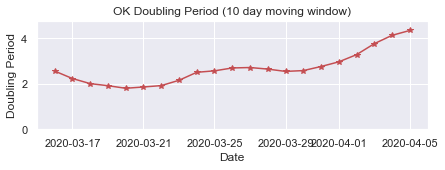

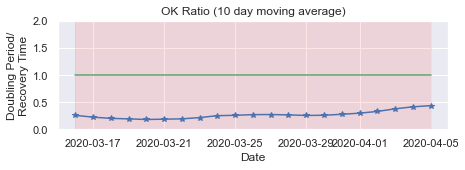

State=ID  (last_update=2020-04-05T19:00)
Doubling every 3.29 days based on last 10 days of data
(naive estimates: current_unresolved=954 hosp=143 icu=38)


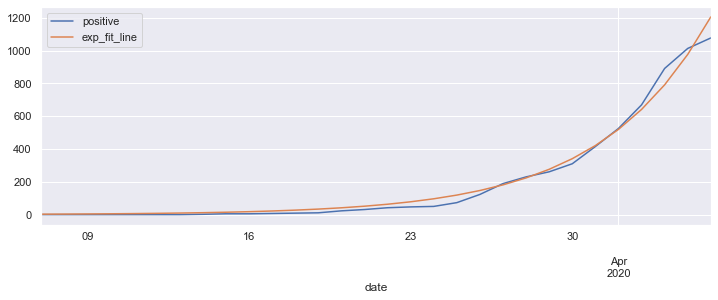

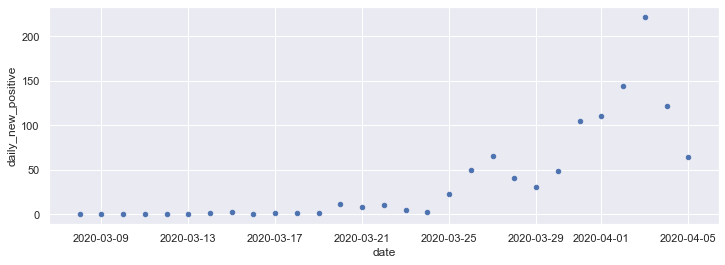

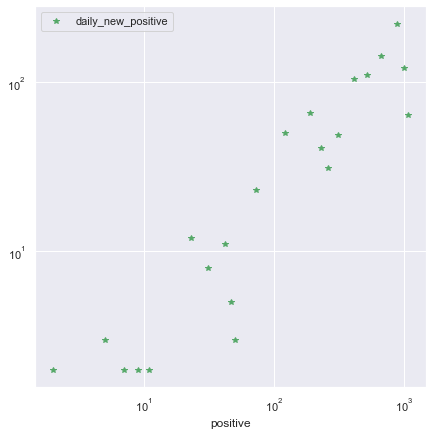

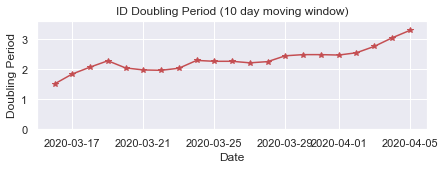

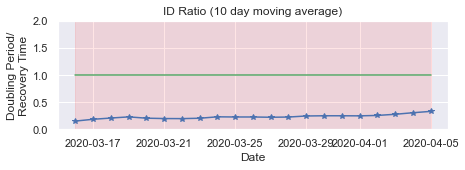

State=OR  (last_update=2020-04-05T11:00)
Doubling every 7.24 days based on last 10 days of data
(naive estimates: current_unresolved=672 hosp=100 icu=26)


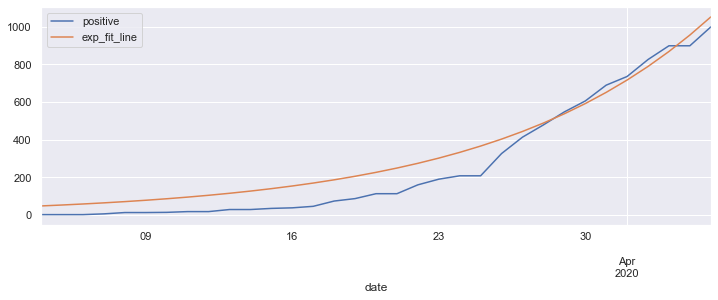

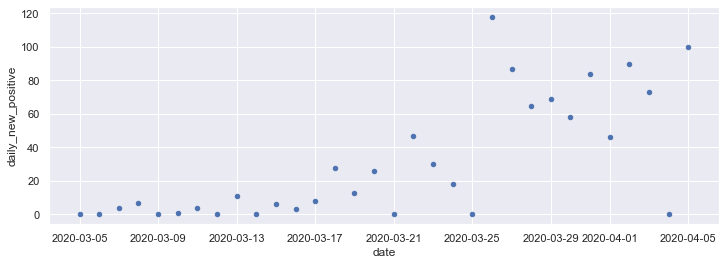

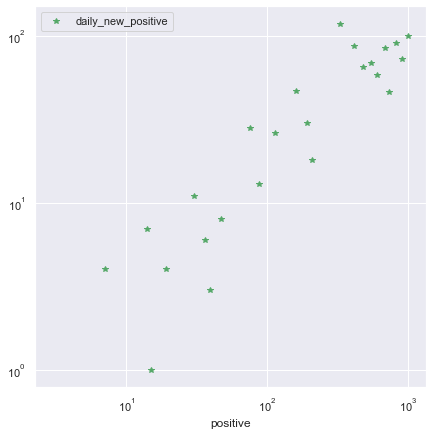

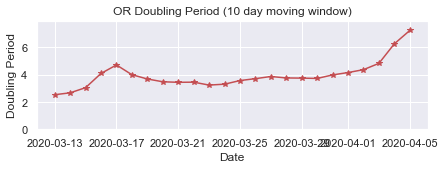

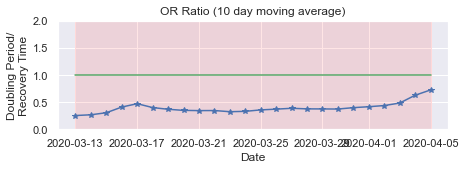

State=DC  (last_update=2020-04-04T00:00)
Doubling every 4.56 days based on last 10 days of data
(naive estimates: current_unresolved=767 hosp=115 icu=30)


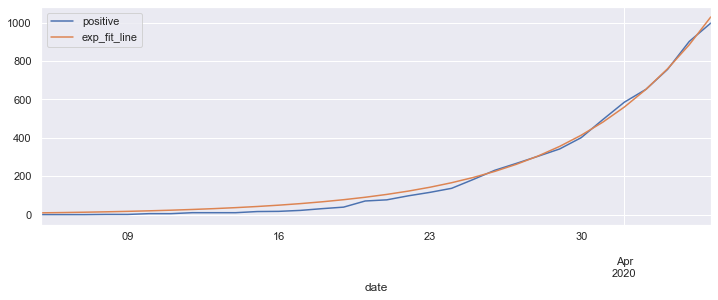

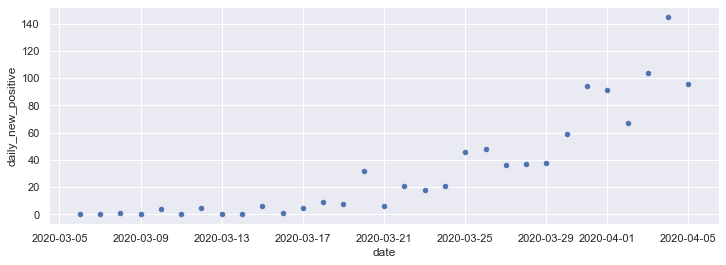

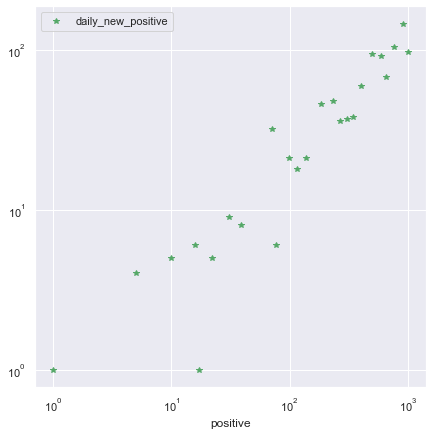

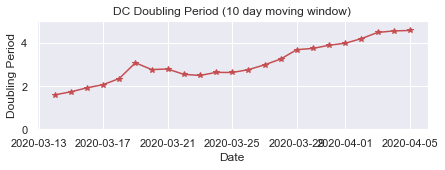

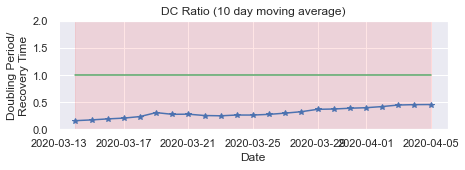

State=KY  (last_update=2020-04-05T17:00)
Doubling every 4.82 days based on last 10 days of data
(naive estimates: current_unresolved=719 hosp=107 icu=28)


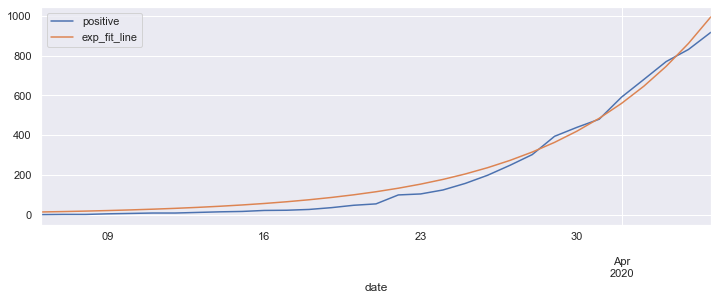

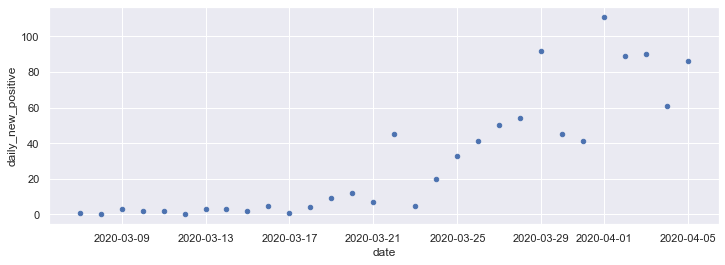

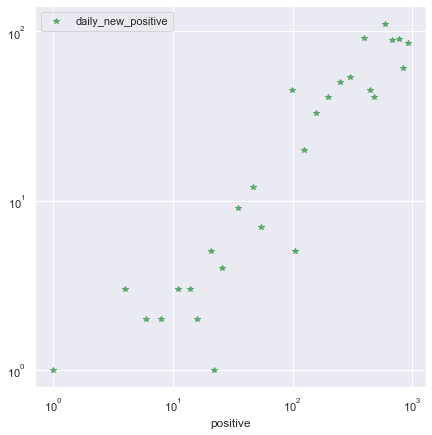

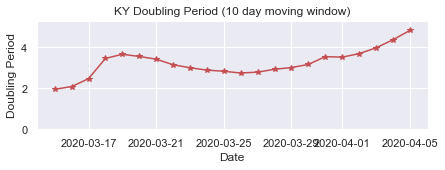

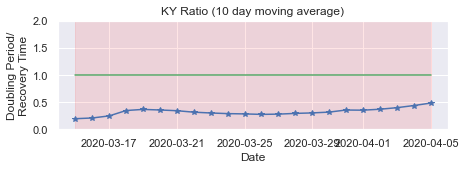

State=MN  (last_update=2020-04-04T17:00)
Doubling every 7.38 days based on last 10 days of data
(naive estimates: current_unresolved=589 hosp=88 icu=23)


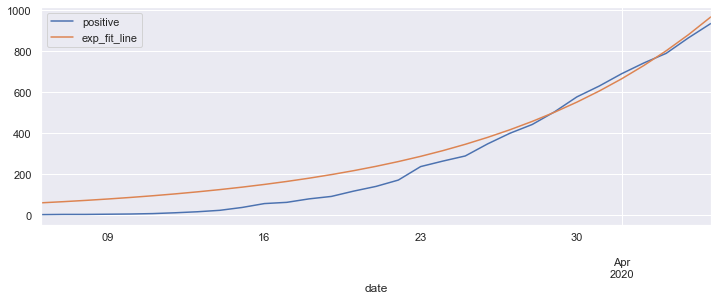

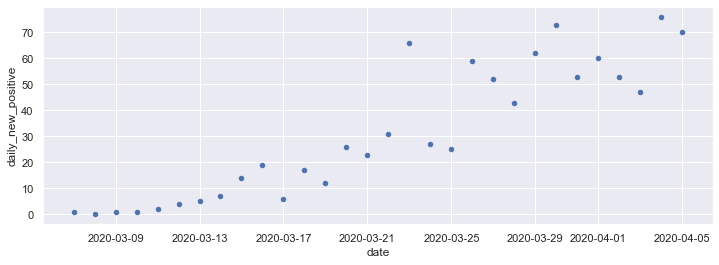

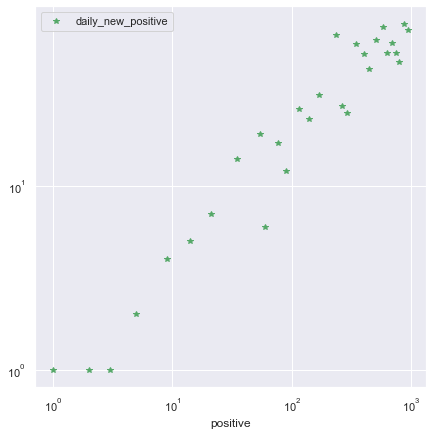

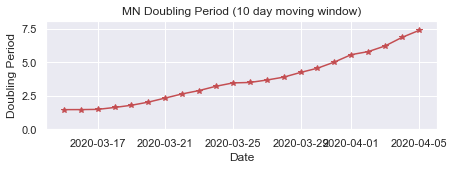

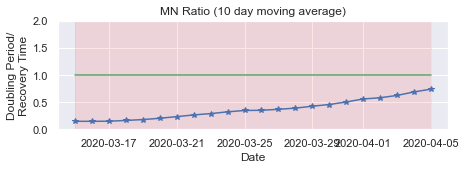

State=RI  (last_update=2020-04-05T00:00)
Doubling every 3.67 days based on last 10 days of data
(naive estimates: current_unresolved=757 hosp=113 icu=30)


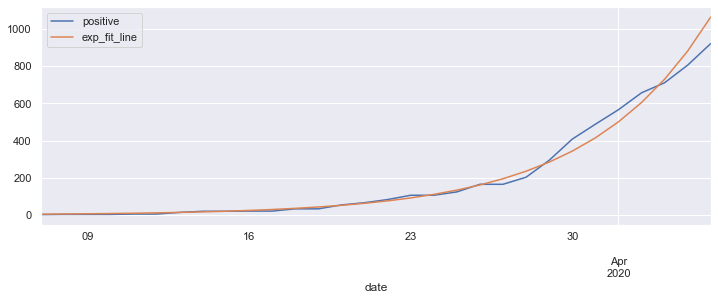

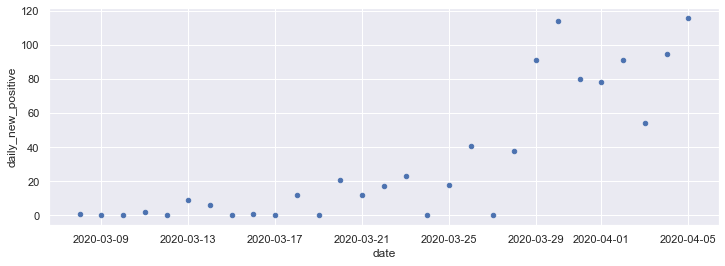

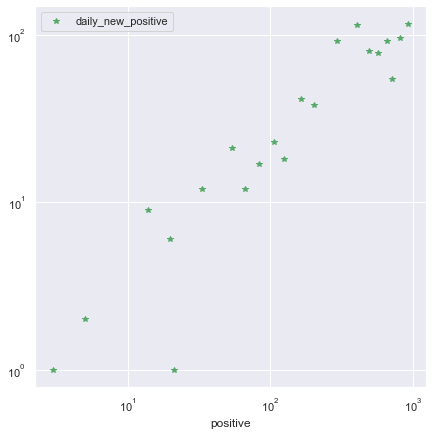

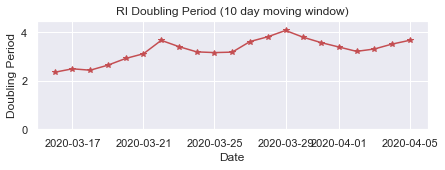

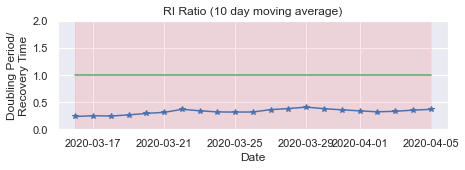

State=IA  (last_update=2020-04-05T00:00)
Doubling every 4.88 days based on last 10 days of data
(naive estimates: current_unresolved=689 hosp=103 icu=27)


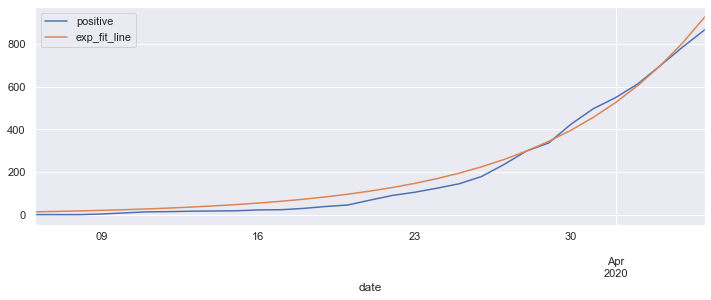

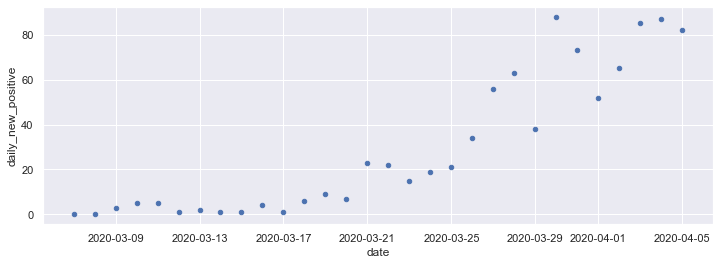

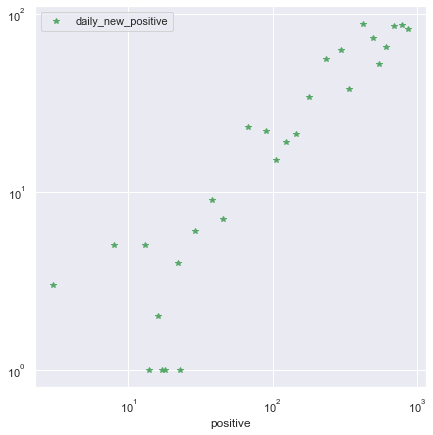

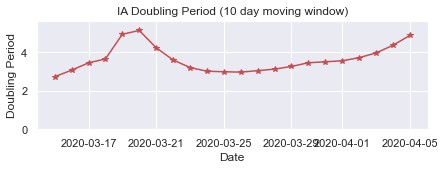

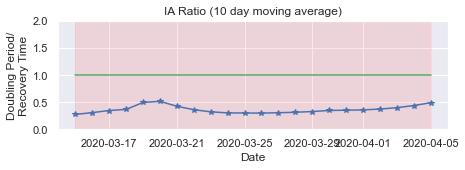

State=AR  (last_update=2020-04-06T08:10)
Doubling every 7.72 days based on last 10 days of data
(naive estimates: current_unresolved=495 hosp=74 icu=19)


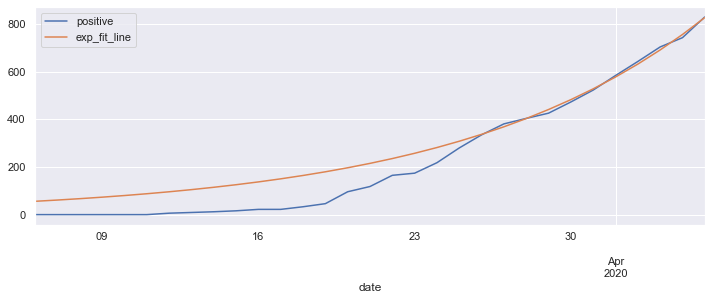

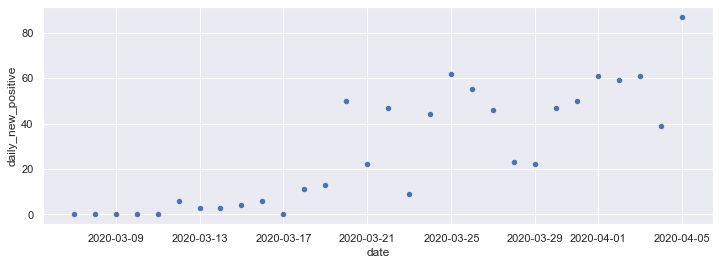

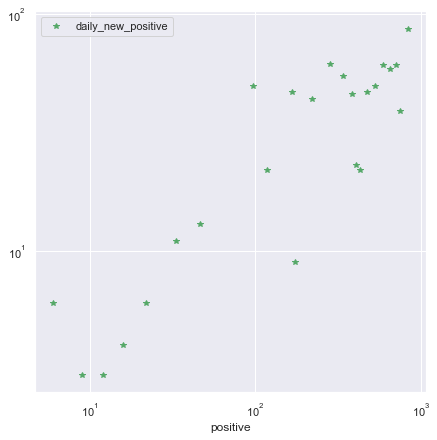

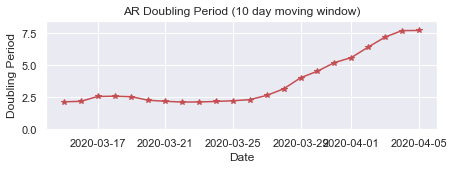

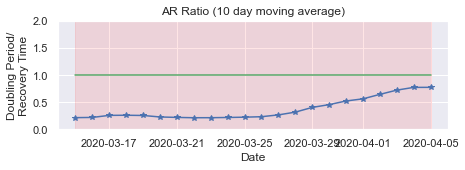

State=KS  (last_update=2020-04-05T12:00)
Doubling every 4.91 days based on last 10 days of data
(naive estimates: current_unresolved=579 hosp=86 icu=23)


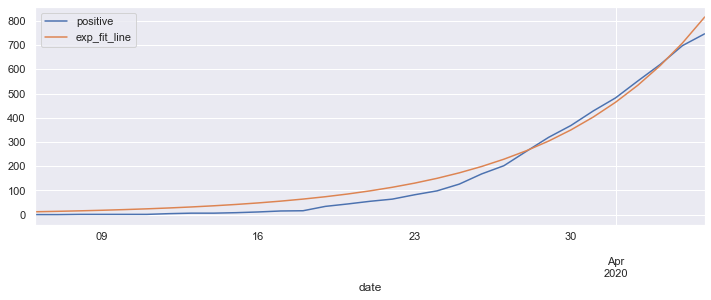

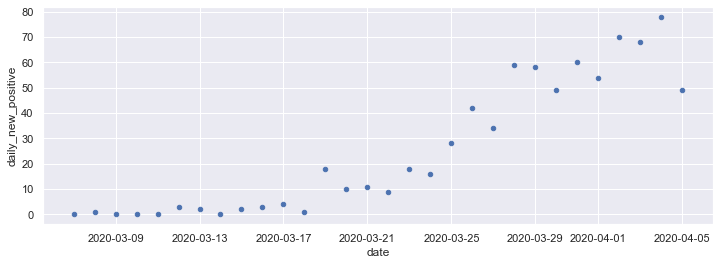

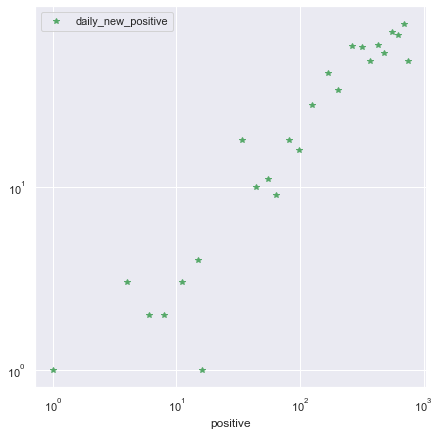

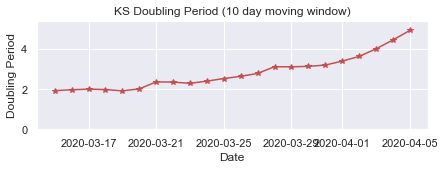

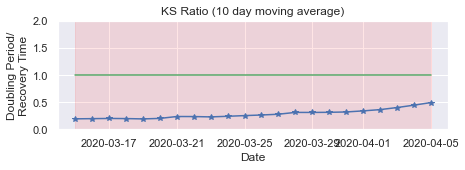

State=DE  (last_update=2020-04-05T12:30)
Doubling every 4.66 days based on last 10 days of data
(naive estimates: current_unresolved=543 hosp=81 icu=21)


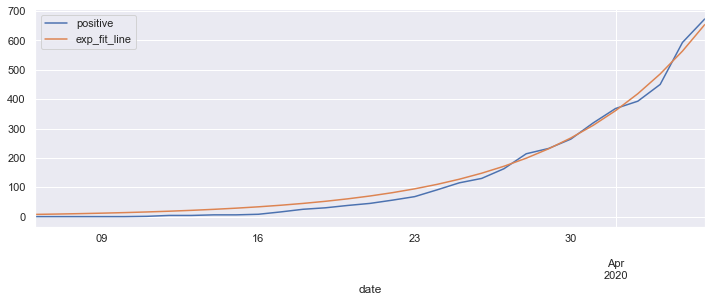

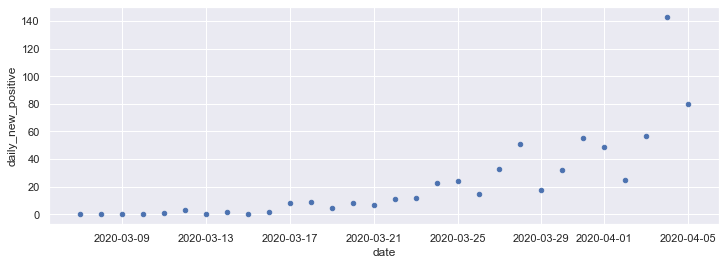

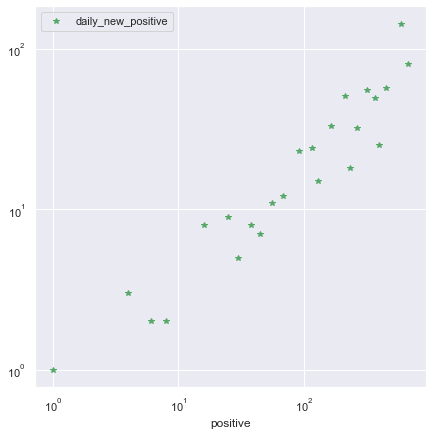

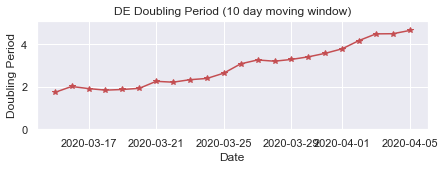

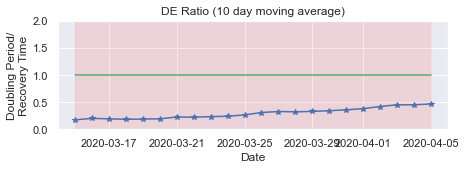

State=NH  (last_update=2020-04-05T09:00)
Doubling every 4.6 days based on last 10 days of data
(naive estimates: current_unresolved=484 hosp=72 icu=19)


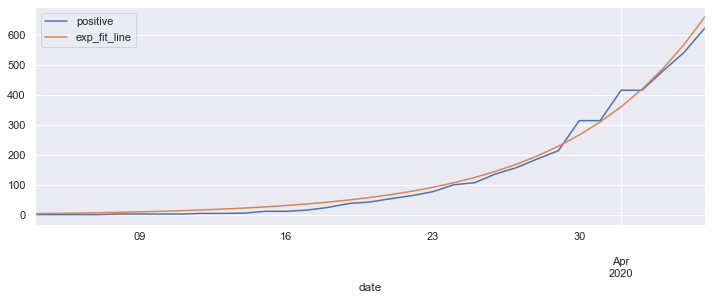

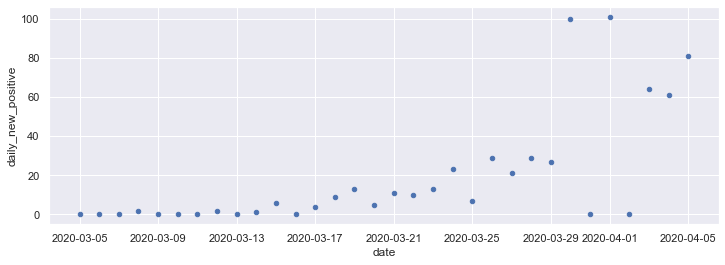

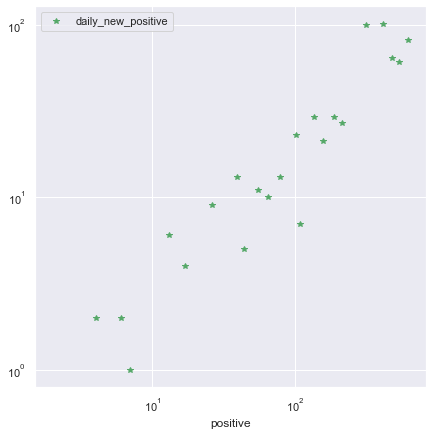

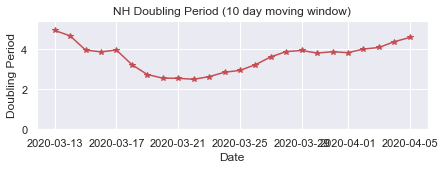

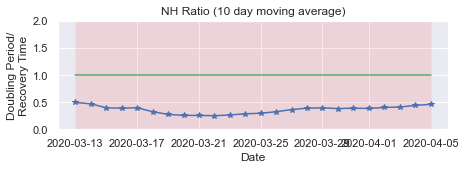

State=NM  (last_update=2020-04-05T00:00)
Doubling every 4.94 days based on last 10 days of data
(naive estimates: current_unresolved=431 hosp=64 icu=17)


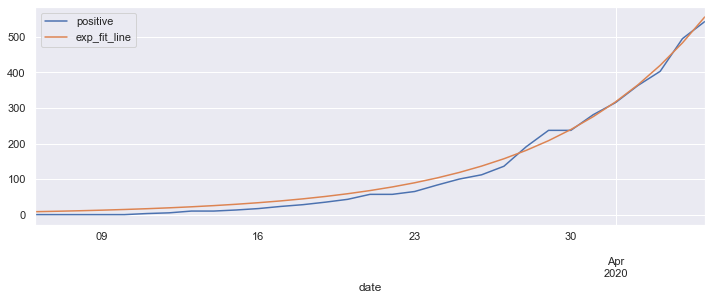

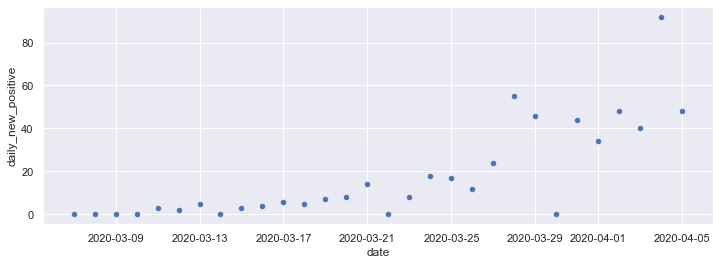

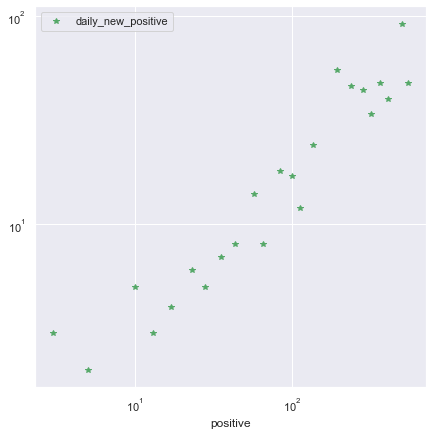

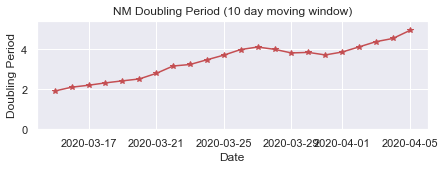

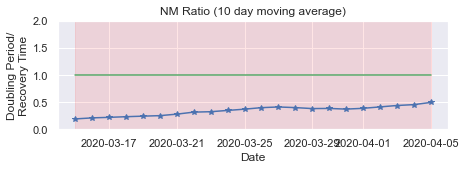

State=PR  (last_update=2020-04-06T07:00)
Doubling every 3.35 days based on last 10 days of data
(naive estimates: current_unresolved=411 hosp=61 icu=16)


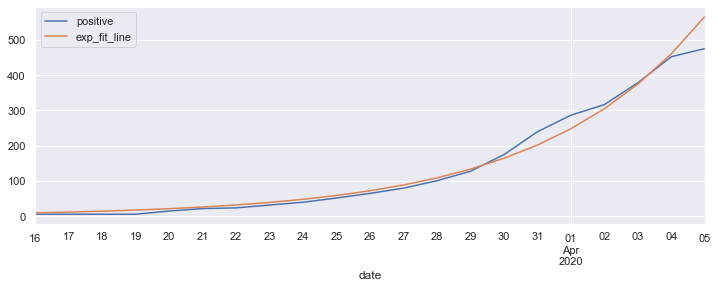

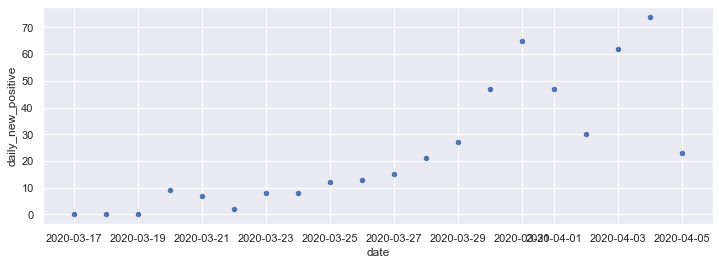

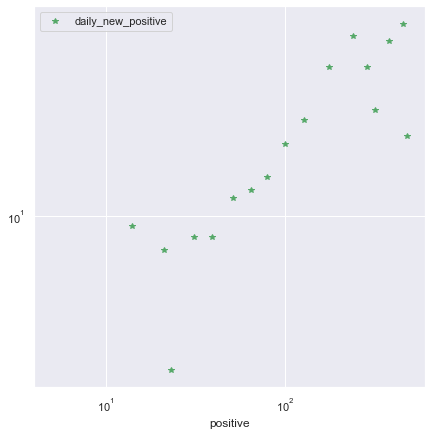

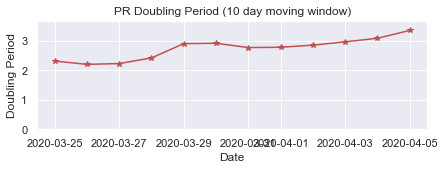

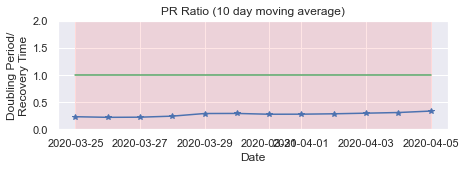

State=VT  (last_update=2020-04-05T13:00)
Doubling every 6.31 days based on last 10 days of data
(naive estimates: current_unresolved=354 hosp=53 icu=14)


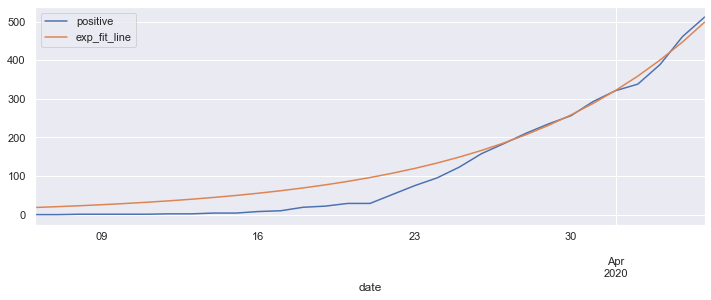

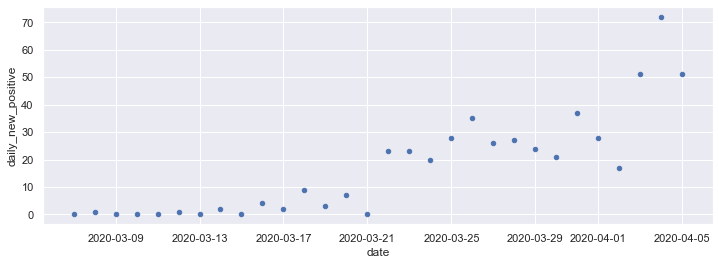

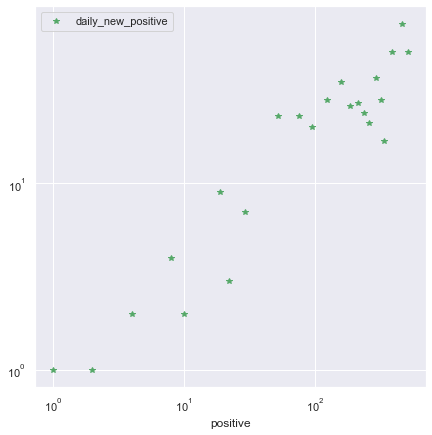

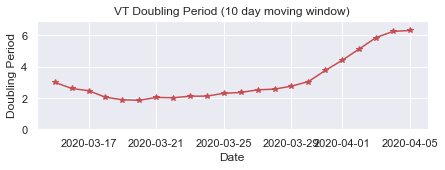

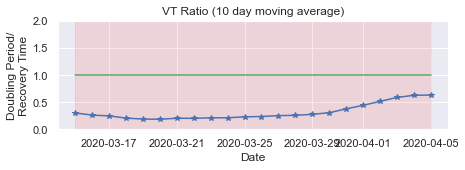

State=ME  (last_update=2020-04-05T11:00)
Doubling every 6.22 days based on last 10 days of data
(naive estimates: current_unresolved=315 hosp=47 icu=12)


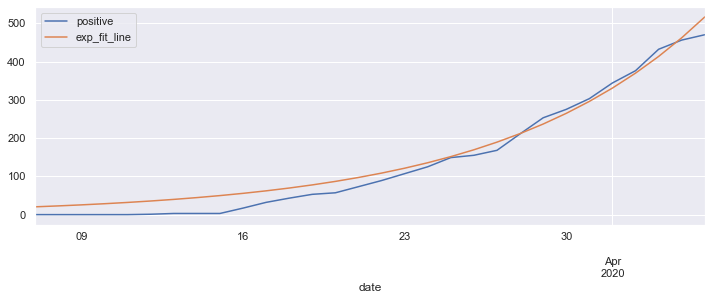

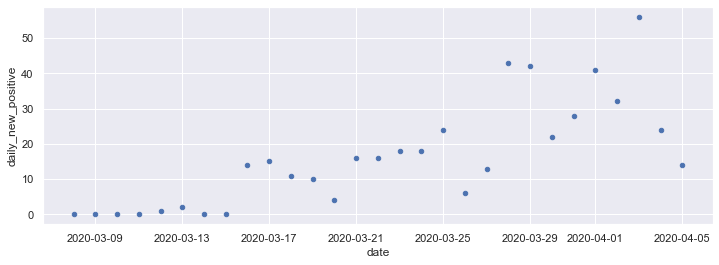

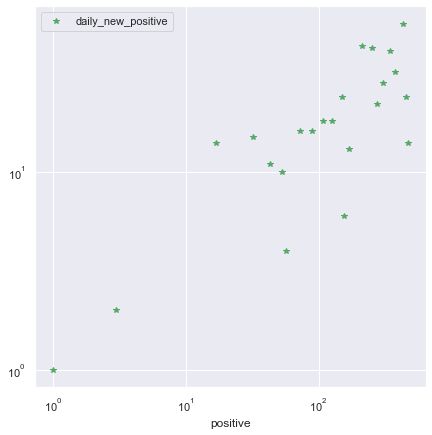

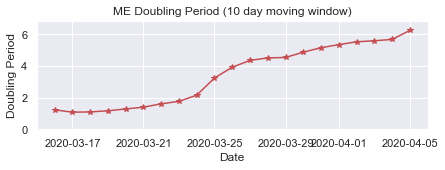

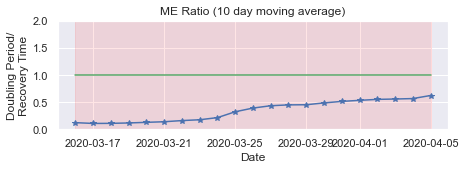

State=HI  (last_update=2020-04-05T18:00)
Doubling every 5.2 days based on last 10 days of data
(naive estimates: current_unresolved=256 hosp=38 icu=10)


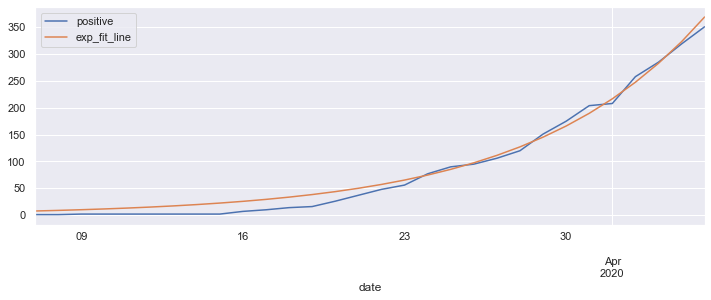

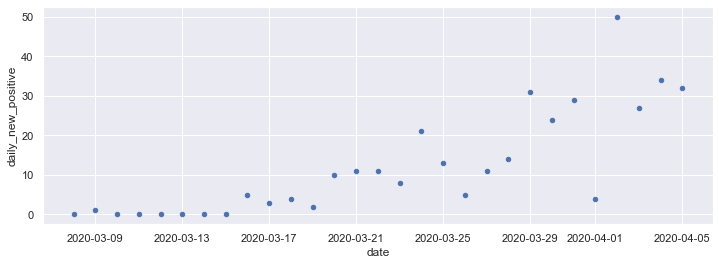

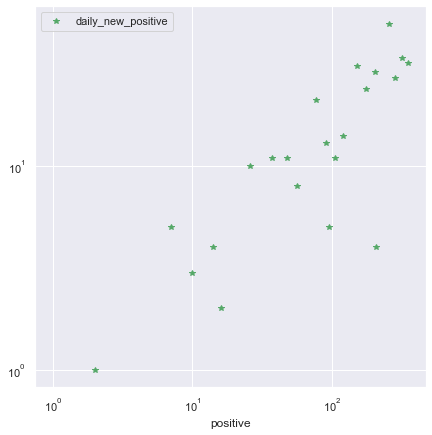

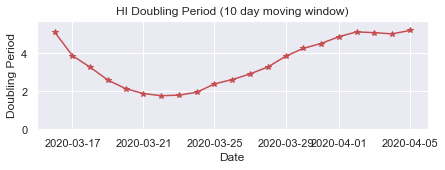

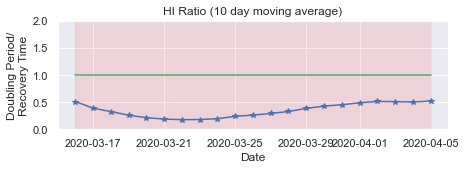

State=NE  (last_update=2020-04-05T20:00)
Doubling every 4.08 days based on last 10 days of data
(naive estimates: current_unresolved=290 hosp=43 icu=11)


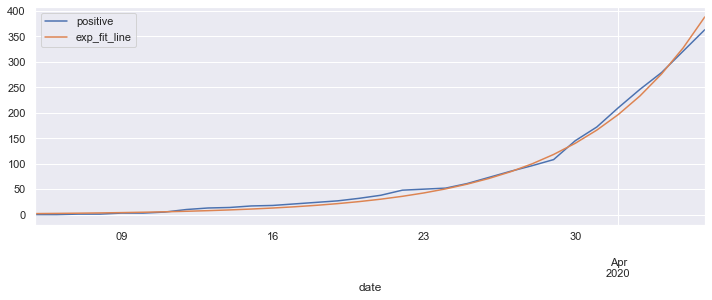

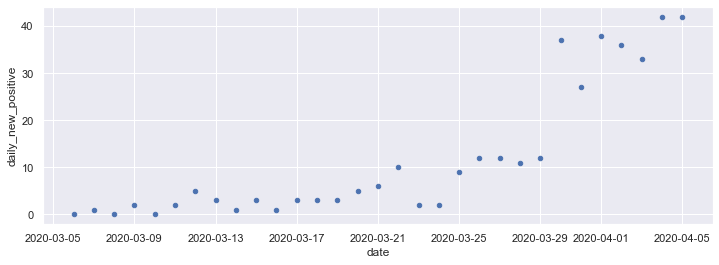

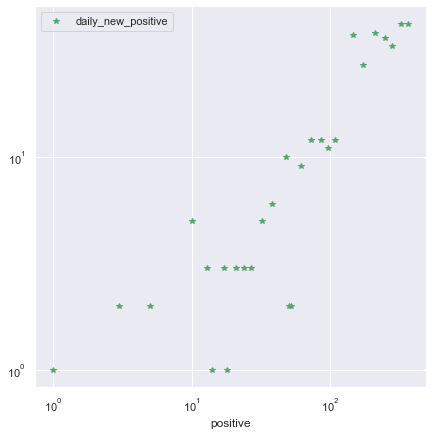

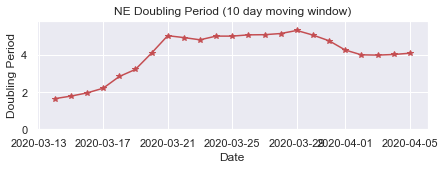

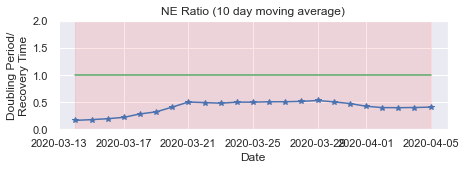

State=WV  (last_update=2020-04-06T10:00)
Doubling every 4.38 days based on last 10 days of data
(naive estimates: current_unresolved=273 hosp=40 icu=10)


/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


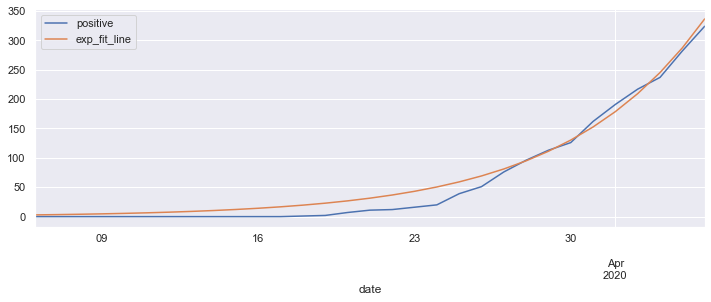

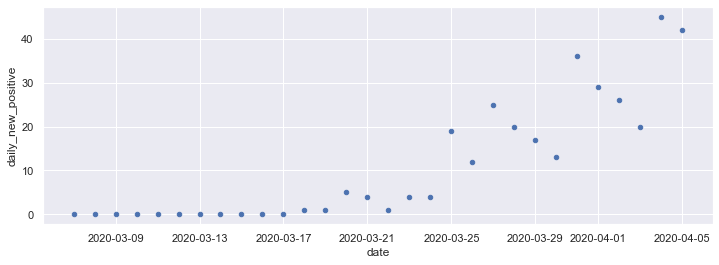

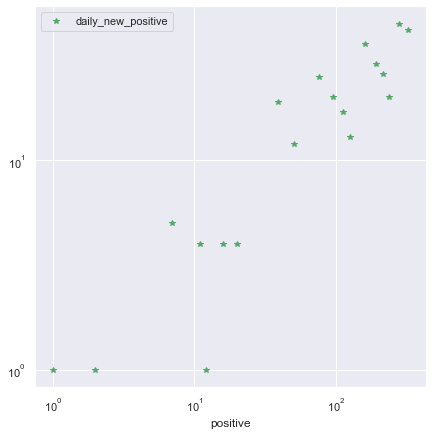

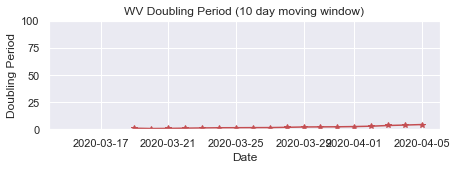

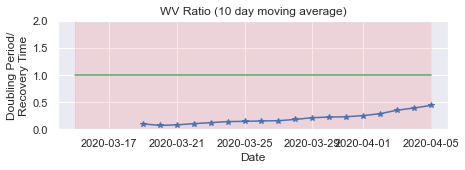

State=MT  (last_update=2020-04-06T10:00)
Doubling every 6.71 days based on last 10 days of data
(naive estimates: current_unresolved=215 hosp=32 icu=8)


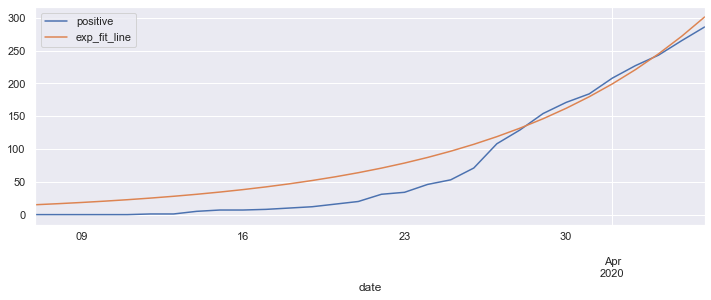

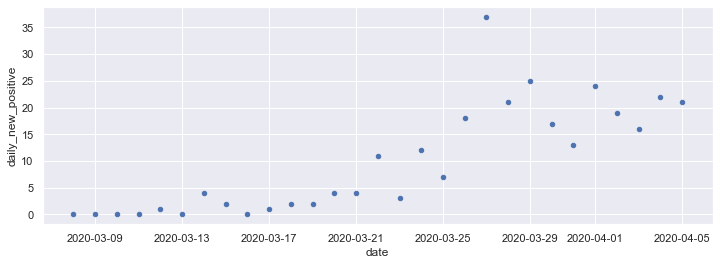

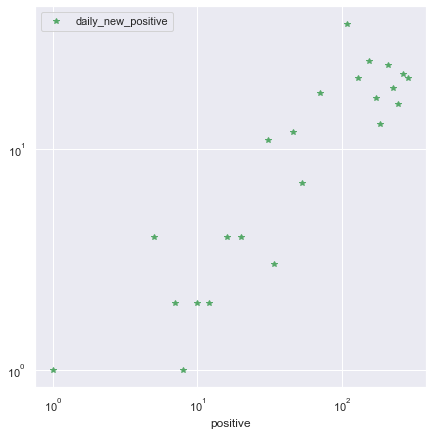

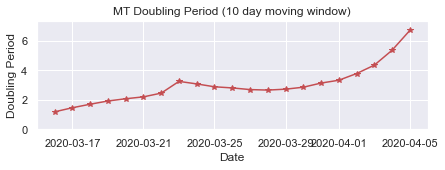

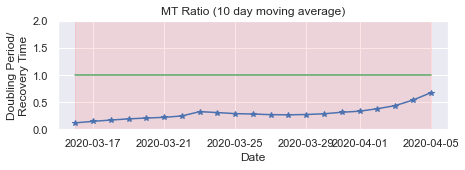

State=SD  (last_update=2020-04-04T18:00)
Doubling every 4.39 days based on last 10 days of data
(naive estimates: current_unresolved=194 hosp=29 icu=7)


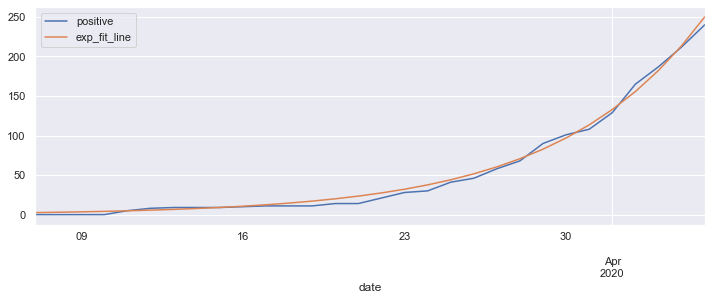

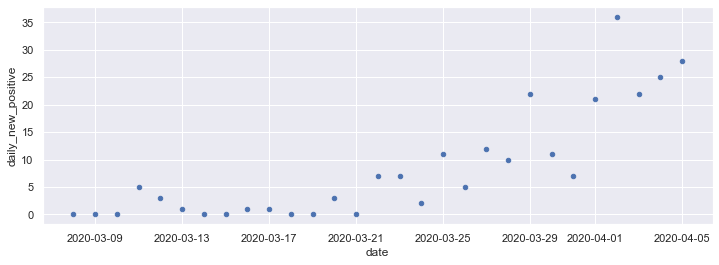

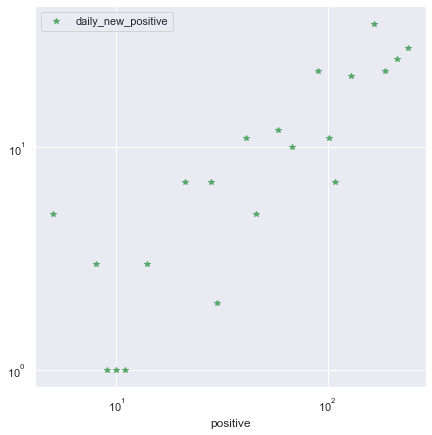

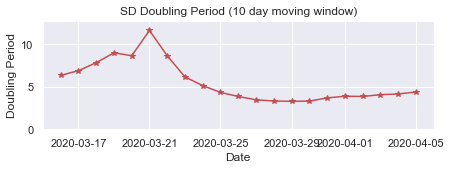

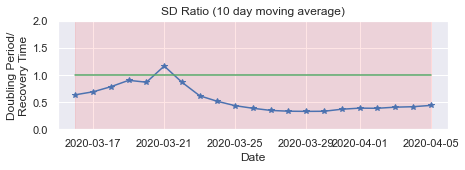

State=ND  (last_update=2020-04-05T12:51)
Doubling every 5.67 days based on last 10 days of data
(naive estimates: current_unresolved=155 hosp=23 icu=6)


/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


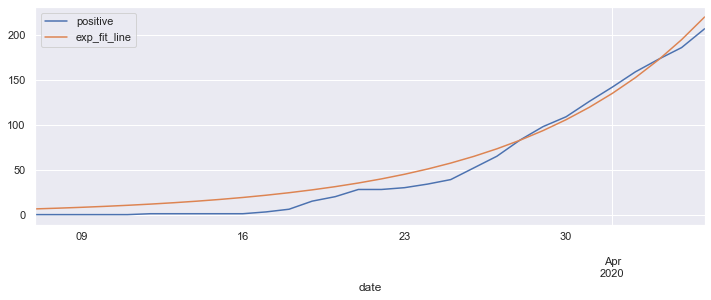

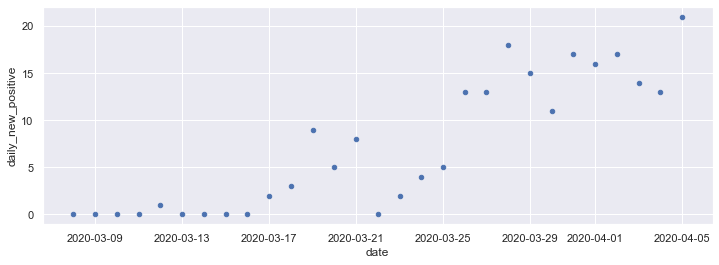

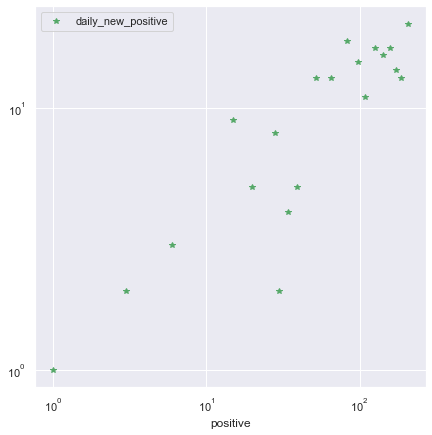

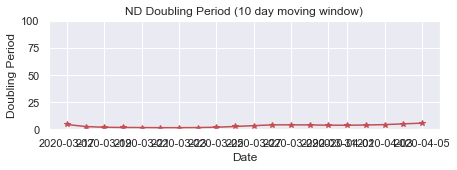

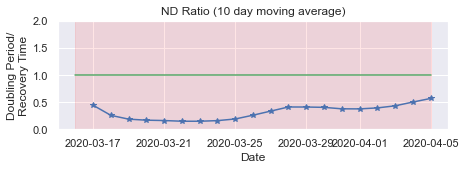

State=WY  (last_update=2020-04-05T18:50)
Doubling every 5.77 days based on last 10 days of data
(naive estimates: current_unresolved=144 hosp=21 icu=5)


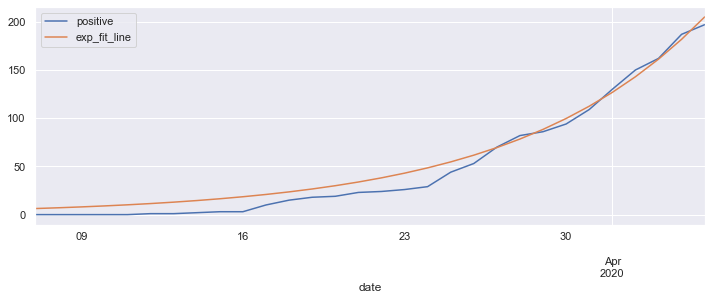

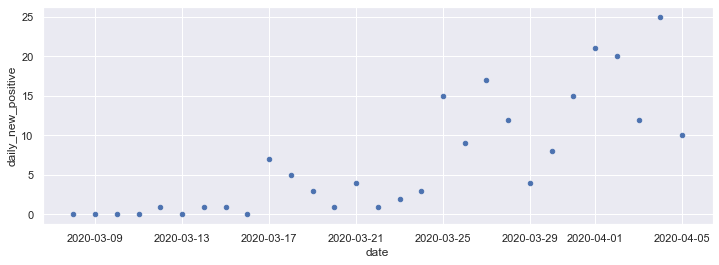

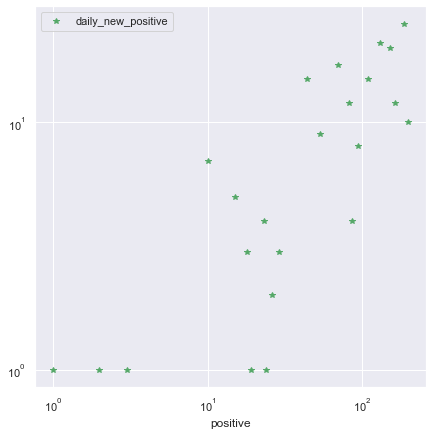

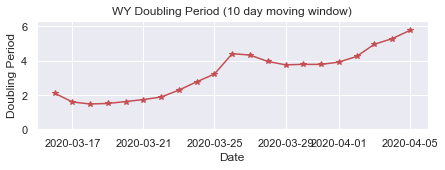

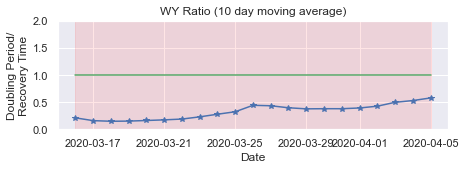

State=AK  (last_update=2020-04-05T14:30)
Doubling every 6.84 days based on last 10 days of data
(naive estimates: current_unresolved=126 hosp=18 icu=5)


/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


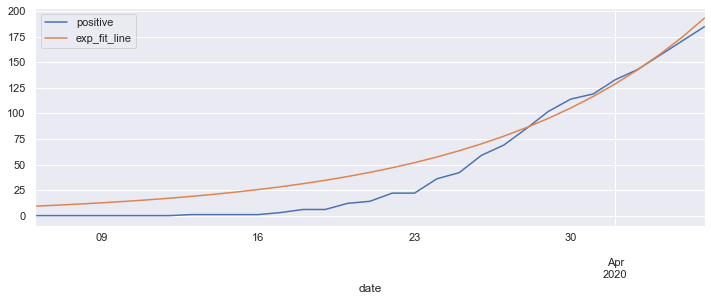

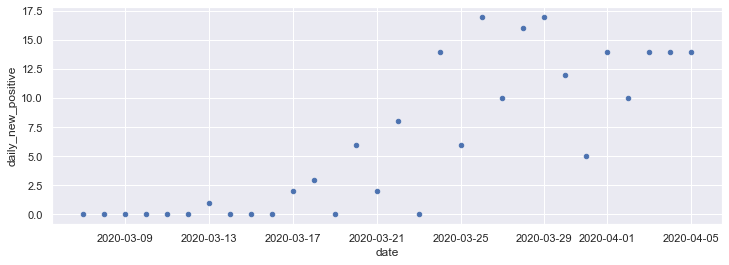

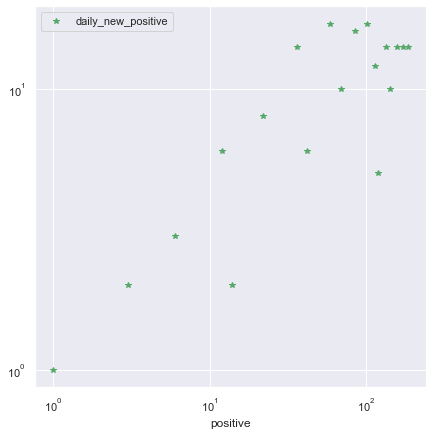

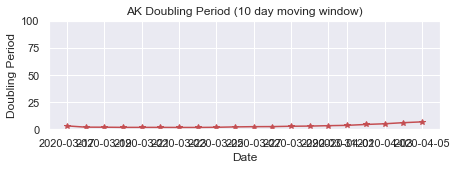

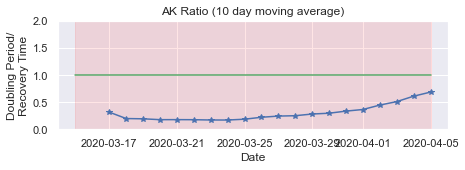

State=GU  (last_update=2020-04-06T06:00)
Doubling every 8.21 days based on last 10 days of data
(naive estimates: current_unresolved=67 hosp=10 icu=2)


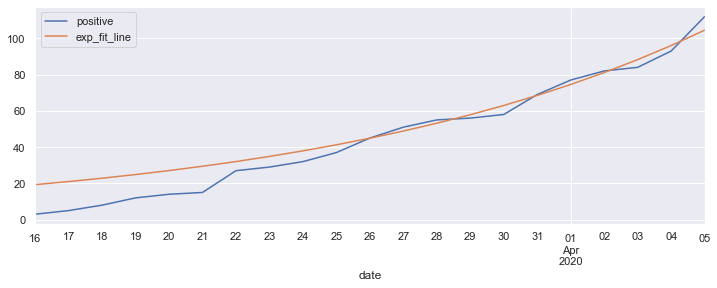

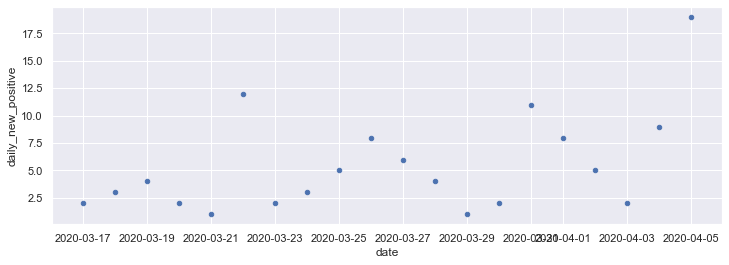

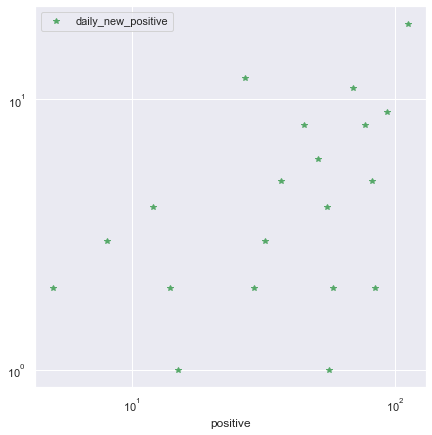

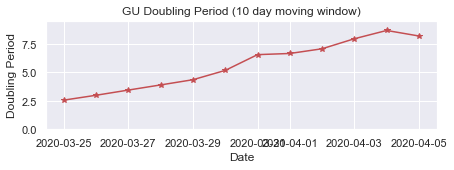

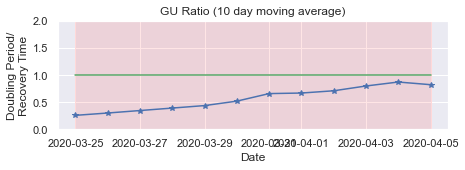

State=VI  (last_update=2020-04-05T00:00)
Doubling every 8.1 days based on last 10 days of data
(naive estimates: current_unresolved=25 hosp=3 icu=1)


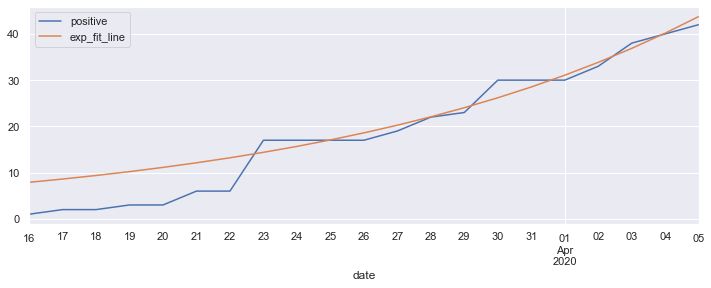

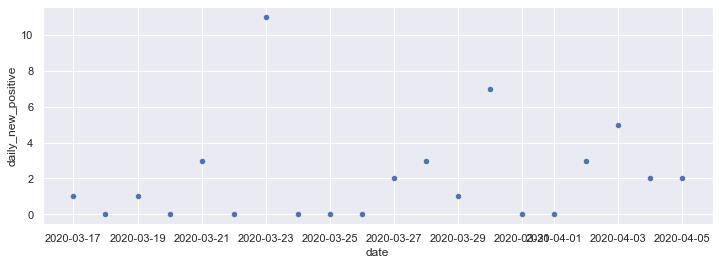

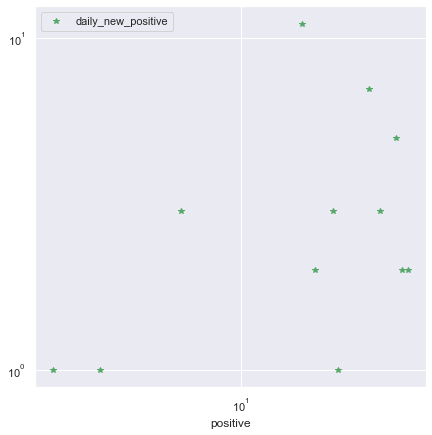

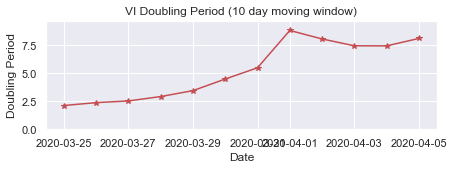

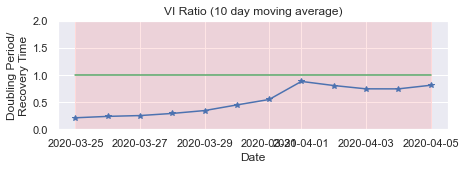

State=MP  (last_update=2020-04-06T02:57)
Doubling every 3.0 days based on last 10 days of data
(naive estimates: current_unresolved=8 hosp=1 icu=0)


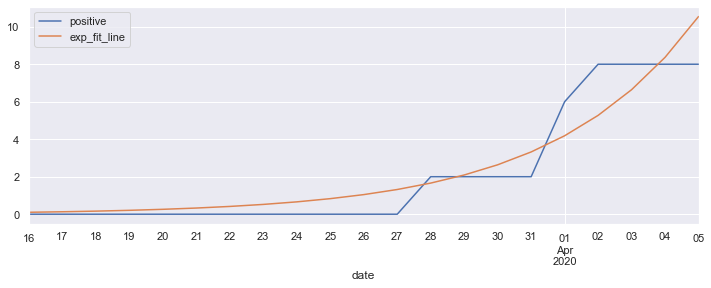

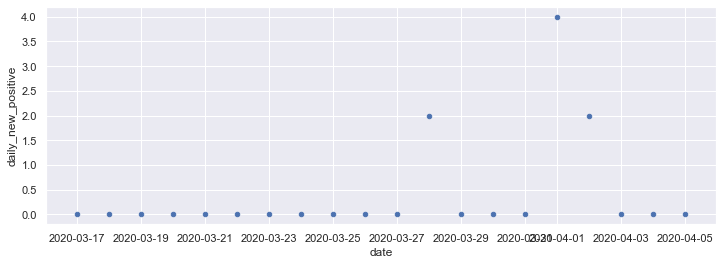

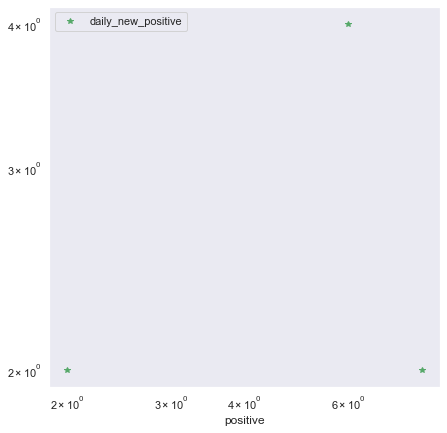

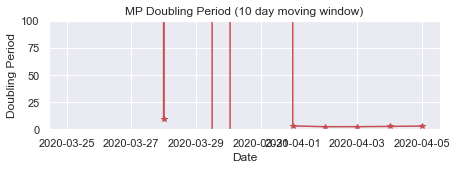

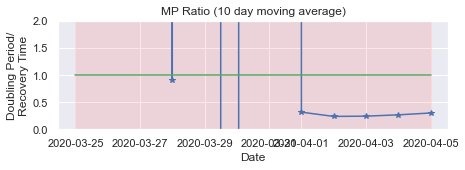

State=AS  (last_update=2020-03-30T23:00)
Doubling every nan days based on last 10 days of data
(naive estimates: current_unresolved=0 hosp=0 icu=0)


/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:520: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


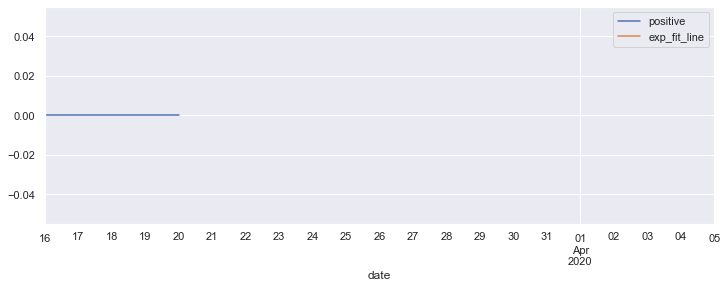

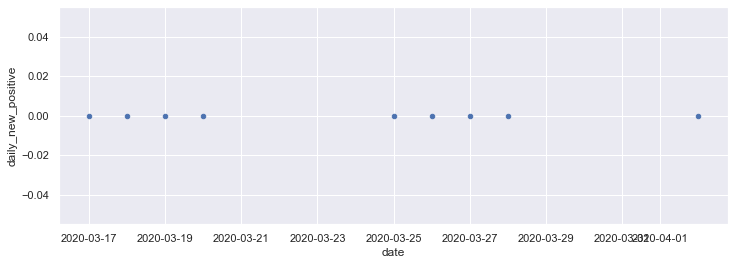

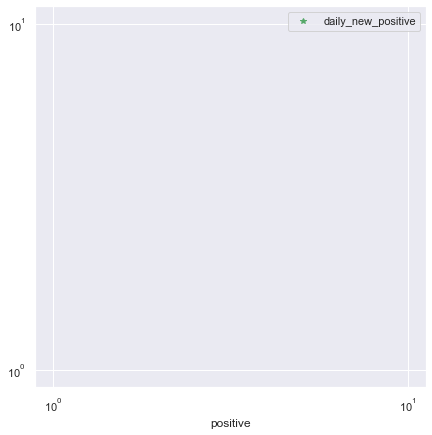

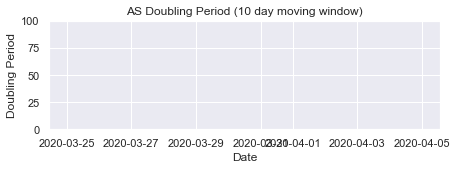

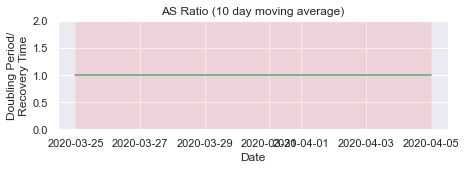

In [14]:
last_n_days = 10
dps = []
for s in states_in_order:
    dfq, dt, lud = get_state_doubling_df(df, s, use_last_n_days=last_n_days)
    dps.append(dt)
    cn, cnh, cni = estimate_current_cases(dfq.daily_new_positive.values)
    lu = str(lud)[:16]
    print("State={}  (last_update={})".format(s, lu))
    print("Doubling every {:.3} days based on last {} days of data".format(dt, last_n_days))
    print("(naive estimates: current_unresolved={} hosp={} icu={})".format(cn, cnh, cni))
    dfq.plot(x="date", y=["positive", "exp_fit_line"], figsize=[12,4])
    if len(dfq) > 1:
        dfq.plot.scatter(x="date", y="daily_new_positive", figsize=[12,4])
    dfq.plot(x="positive", y="daily_new_positive", figsize=[7,7], style="*g", logy=True, logx=True)
    period_factor_plot(dfq,s, ylimit=2)
    plt.show()

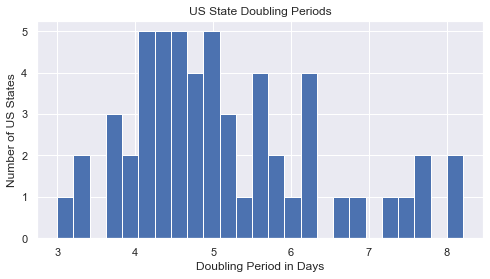

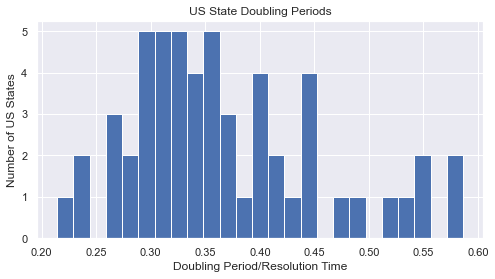

In [15]:
plt.figure(figsize=[8,4])
dps = np.array(dps)
dps = dps[~np.isnan(dps)]
dp_state = dps[dps < 30]
dp_state = dp_state[dp_state > 0]
a = plt.hist(dp_state, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period in Days")
plt.ylabel("Number of US States")
plt.show()
# or in terms of resolution time
plt.figure(figsize=[8,4])
resolution_time = 14
a = plt.hist(dp_state/resolution_time, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period/Resolution Time")
plt.ylabel("Number of US States")
plt.show()

### Rolling Doubling Period for US

### Rolling Doubling Period World

In [16]:
dfw, wsl = get_world_dataset_df_from_file()
dfw.head()

Entity state          Date  positive       date  \
0  Afghanistan   AFG  Dec 31, 2019         0 2019-12-31   
1  Afghanistan   AFG   Jan 1, 2020         0 2020-01-01   
2  Afghanistan   AFG   Jan 2, 2020         0 2020-01-02   
3  Afghanistan   AFG   Jan 3, 2020         0 2020-01-03   
4  Afghanistan   AFG   Jan 4, 2020         0 2020-01-04   

                lastUpdateEt  negative  pending  
0 2020-04-06 16:15:42.524635         0        0  
1 2020-04-06 16:15:42.524635         0        0  
2 2020-04-06 16:15:42.524635         0        0  
3 2020-04-06 16:15:42.524635         0        0  
4 2020-04-06 16:15:42.524635         0        0

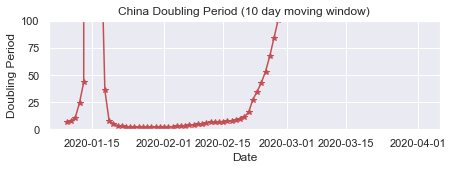

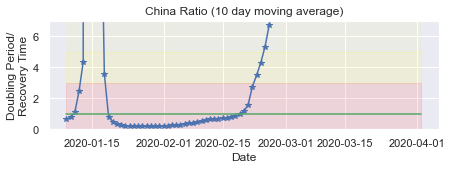

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


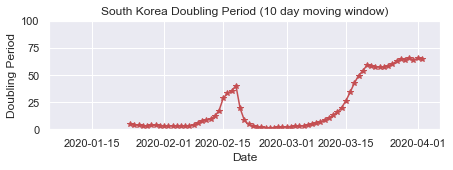

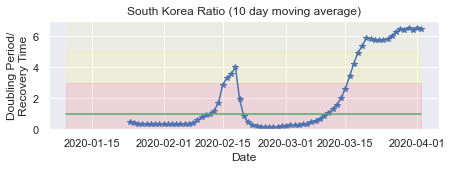

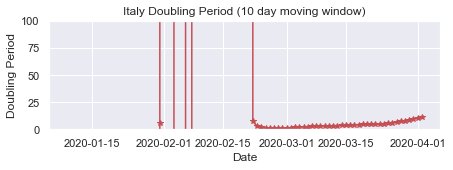

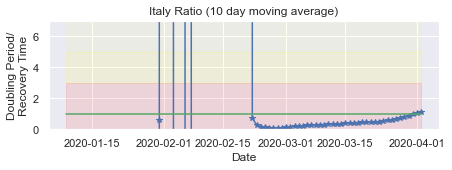

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


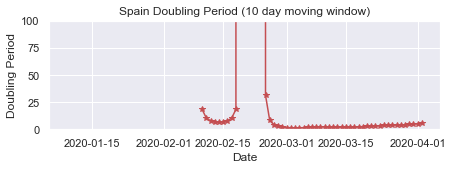

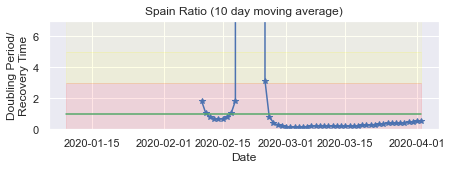

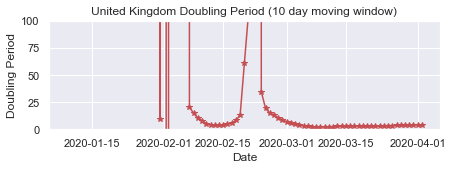

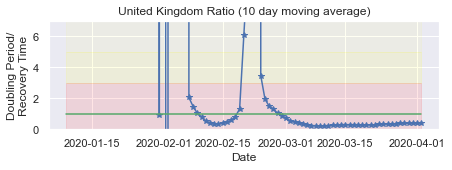

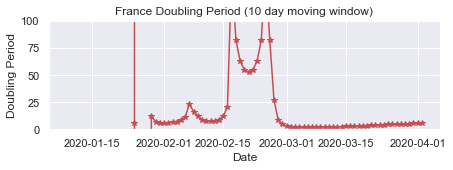

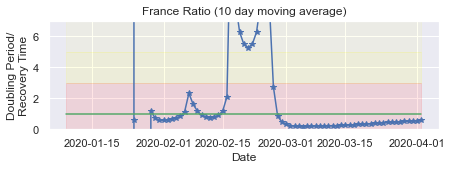

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


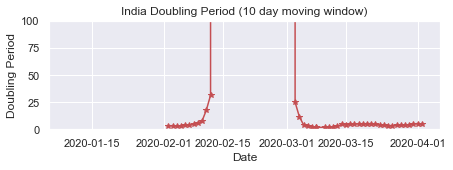

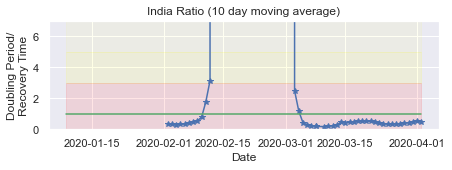

In [17]:
period_factor_plot(dfw,"CHN")
period_factor_plot(dfw,"KOR")
period_factor_plot(dfw,"ITA")
period_factor_plot(dfw,"ESP")
period_factor_plot(dfw,"GBR")
period_factor_plot(dfw,"FRA")
period_factor_plot(dfw,"IND")

### Rolling Doubling Period States

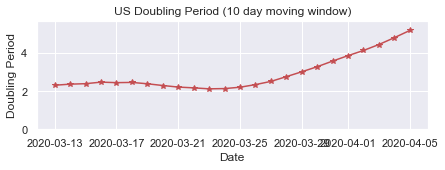

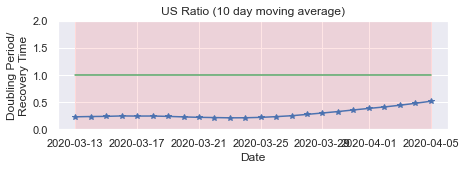

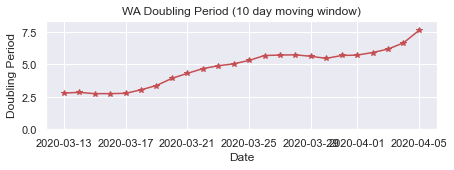

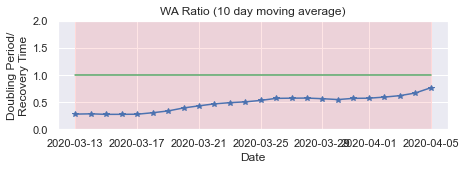

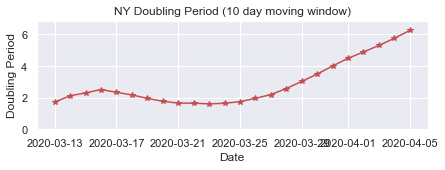

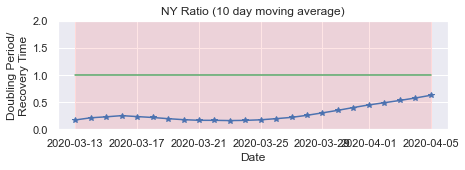

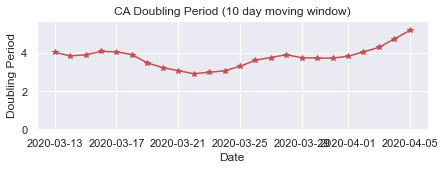

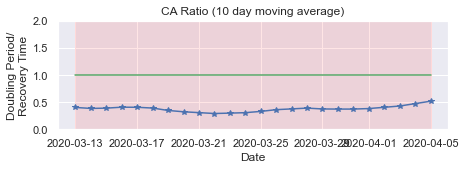

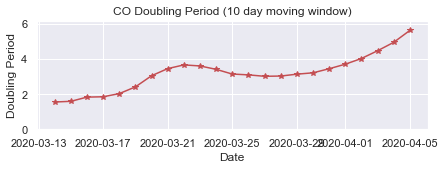

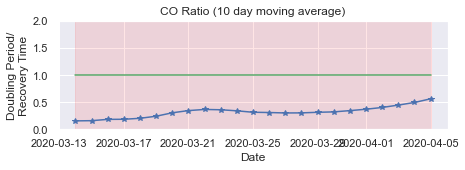

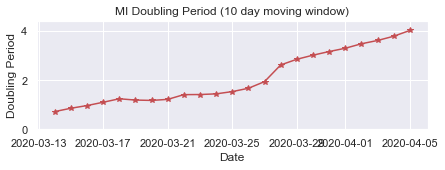

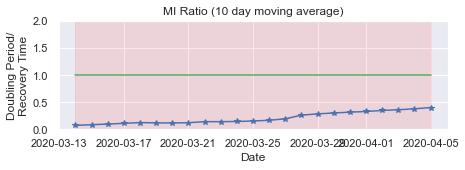

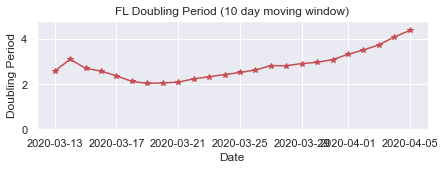

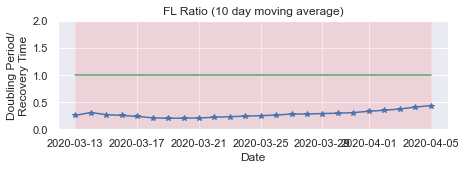

In [18]:
dfw, _ = get_state_df(df, "*")
period_factor_plot(dfw,"*", ylimit=2)
dfw, _ = get_state_df(df, "WA")
period_factor_plot(dfw,"WA", ylimit=2)
dfw, _ = get_state_df(df, "NY")
period_factor_plot(dfw,"NY", ylimit=2)
dfw, _ = get_state_df(df, "CA")
period_factor_plot(dfw,"CA", ylimit=2)
dfw, _ = get_state_df(df, "CO")
period_factor_plot(dfw,"CO", ylimit=2)
dfw, _ = get_state_df(df, "MI")
period_factor_plot(dfw,"MI", ylimit=2)
dfw, _ = get_state_df(df, "FL")
period_factor_plot(dfw,"FL", ylimit=2)

### Big Grid of Daily Total Verified Covid-19 Cases by State

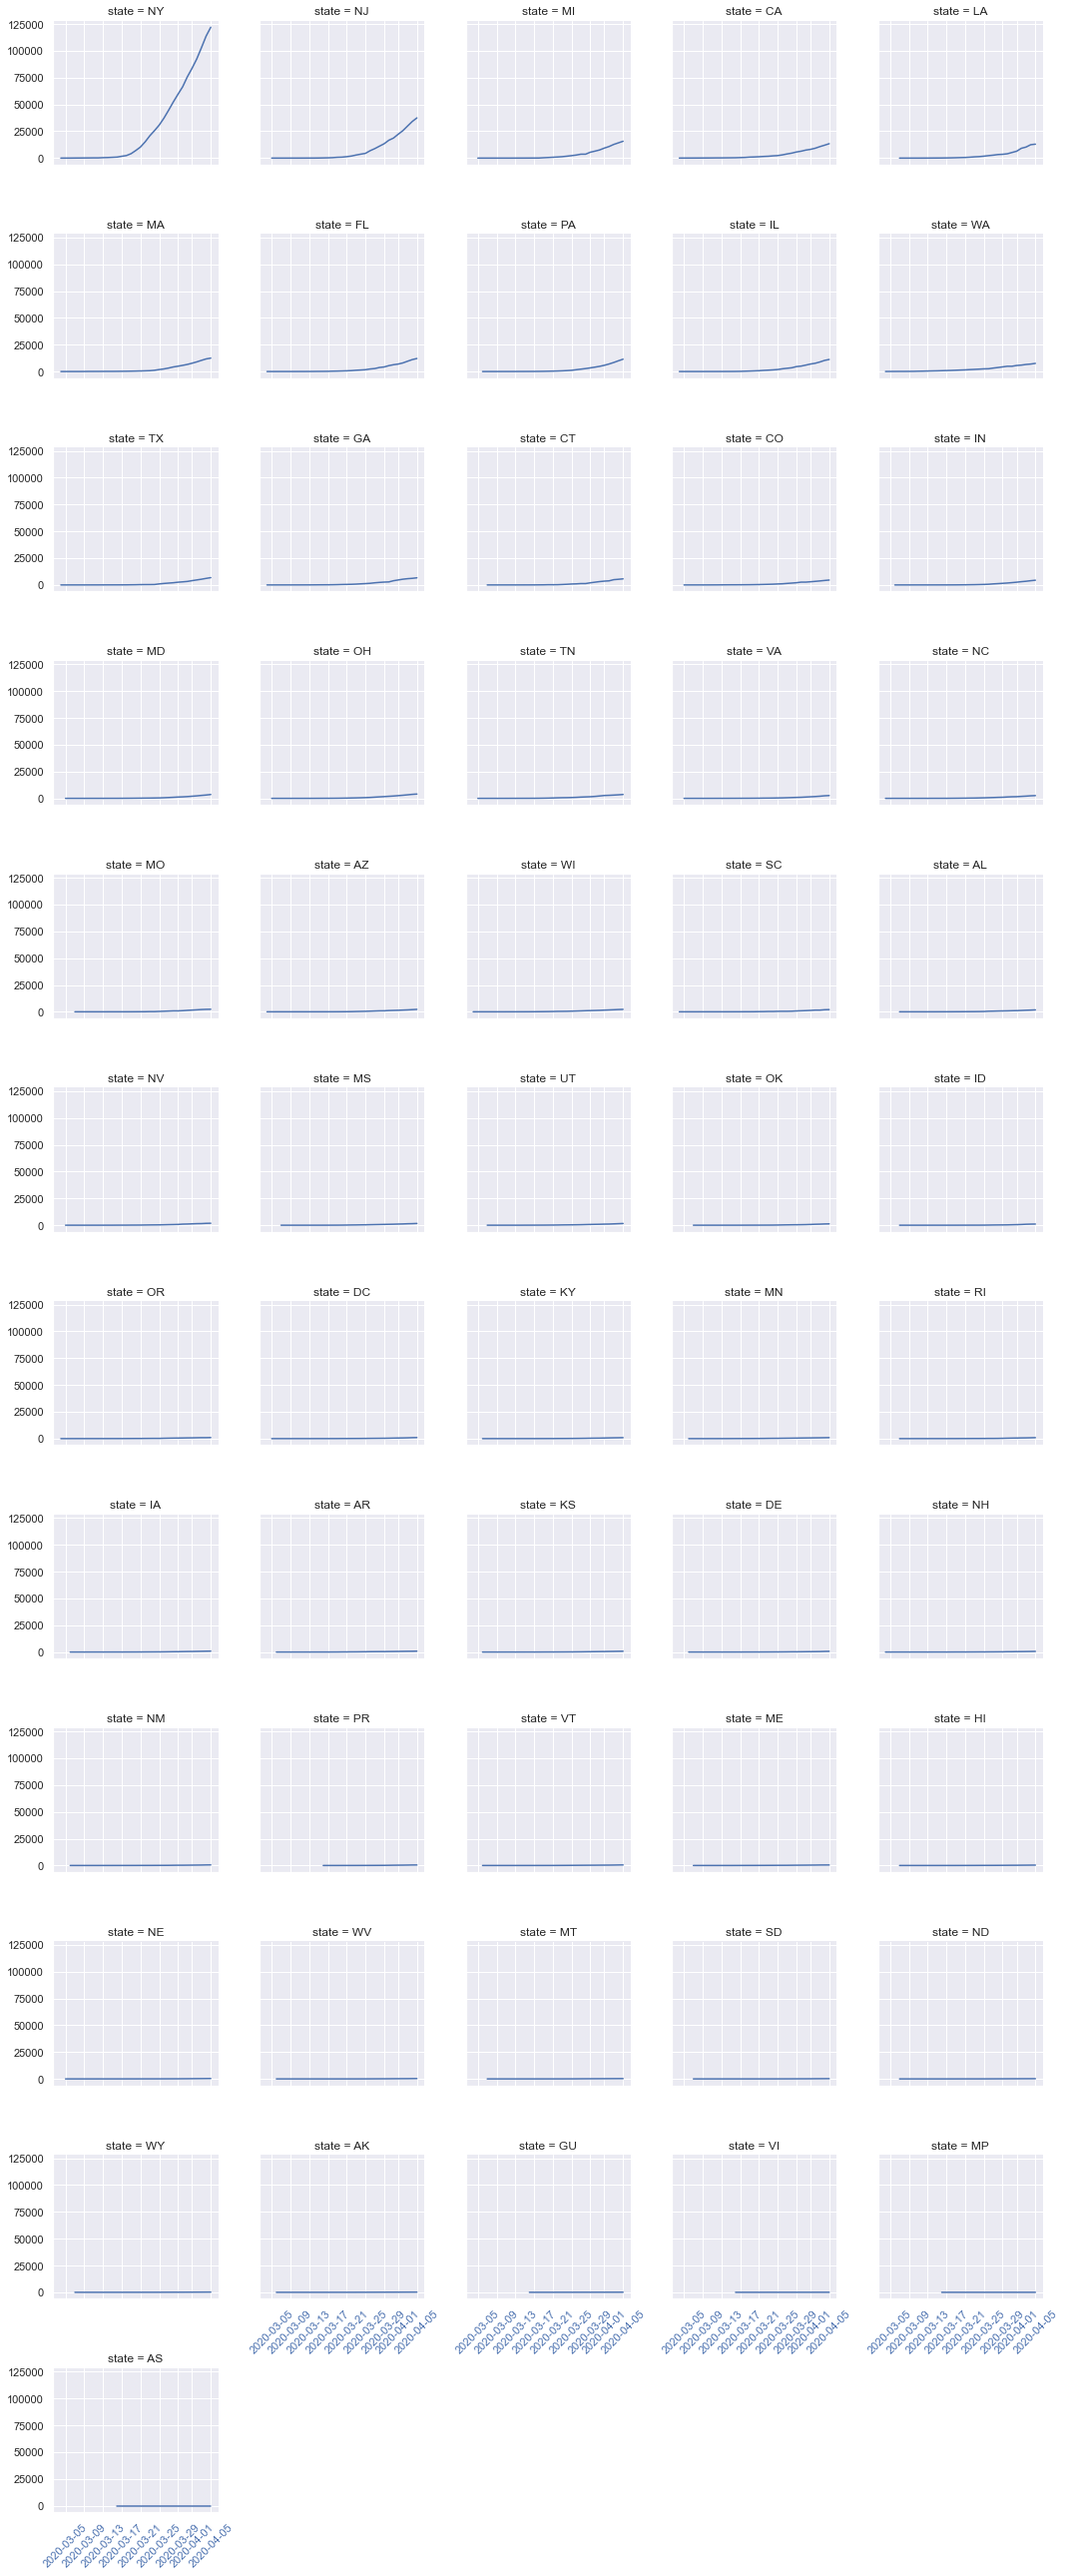

In [19]:
g = sns.FacetGrid(df, col="state", col_wrap=5, height=3, margin_titles=True)
g.map(plt.plot,"date","positive",color="b")
g.map(plt.xticks, rotation=45)